In [1]:
import math, random
import matplotlib.pyplot as plt
import numpy as np
import cvxpy as cv
import pandas as pd

# Data

Matrix of counts of transcripts for 10,727 genes (rows) in each of 225 cells (columns)

In [15]:
data = pd.read_csv("../Data/SS3_c57_UMIs_concat.csv", index_col="Unnamed: 0")
data.head()

,SS3_MAF_Leo171129_p2_S10,SS3_MAF_Leo171129_p2_S12,SS3_MAF_Leo171129_p2_S13,SS3_MAF_Leo171129_p2_S14,SS3_MAF_Leo171129_p2_S16,SS3_MAF_Leo171129_p2_S17,SS3_MAF_Leo171129_p2_S18,SS3_MAF_Leo171129_p2_S19,SS3_MAF_Leo171129_p2_S1,SS3_MAF_Leo171129_p2_S20,...,SS3_MAF_leo180223_p4_S182,SS3_MAF_leo180223_p4_S186,SS3_MAF_leo180223_p4_S187,SS3_MAF_leo180223_p4_S191,SS3_MAF_leo180223_p4_S185,SS3_MAF_leo180223_p4_S189,SS3_MAF_leo180223_p4_S188,SS3_MAF_leo180223_p4_S190,SS3_MAF_leo180223_p4_S98,SS3_MAF_leo180223_p4_S99
0610005C13Rik,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
0610007P14Rik,0.0,2.0,2.0,2.0,1.0,4.0,4.0,4.0,7.0,2.0,...,1.0,3.0,0.0,1.0,2.0,9.0,4.0,0.0,0.0,0.0
0610009B22Rik,10.0,4.0,NaN,NaN,0.0,14.0,26.0,6.0,1.0,2.0,...,6.0,5.0,2.0,1.0,14.0,0.0,1.0,4.0,3.0,2.0
0610009L18Rik,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
0610009O20Rik,3.0,0.0,0.0,2.0,0.0,1.0,0.0,2.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0


For each gene, the counts of transcipts in cells can be considered samples from the bursting reaction stationary distribution. So we can employ the same method to bootstrap the samples and create confidence intervals for stationary distribution values, but using real data as the sample instead of synthetic data simulated via the gillespie algorithm

In [16]:
def bootstrap_data(x_list, samples, N, plot=False, printing=False):
    """
    Bootstrap sample data to find confidence intervals of
    stationary distribution values.

    Inputs:
    x_list: states to calculate stationary estimates for
    samples: list of samples from stationary distribution (counts of transcripts)
    N: number of bootstrap samples
    plot: whether to plot histograms of bootstrap estimates with CI lines
    printing: whether to print CI's

    Output:
    intervals: list of confidence intervals for stationary distribution values
        of states in x_list
    """

    # simulate N bootstrap samples: estimates p(x) for each, and for each x
    n = len(samples)
    estimates = [[] for x in x_list]
    for i in range(N):
        sample = random.choices(samples,k = n)
        for i, x in enumerate(x_list):
            estimates[i].append(sample.count(x) / n)

    # create confidence intervals (95%) via 2.5%, 97.5% quantiles for each x
    intervals = [np.quantile(est,[0.025,0.975]) for est in estimates]
    
    # plot histograms and CI
    for i, x in enumerate(x_list):
        if printing:
            print(f"95% CI for p({x}) is: ({intervals[i][0]}, {intervals[i][1]})")
        if plot:
            plt.hist(estimates[i])
            plt.title(f"Hist of p({x})")
            plt.axvline(intervals[i][0], color="red")
            plt.axvline(intervals[i][1], color="red")
            plt.show()

    # return CIs
    return intervals

## Example of process

Look at the distribution of samples for a random gene:

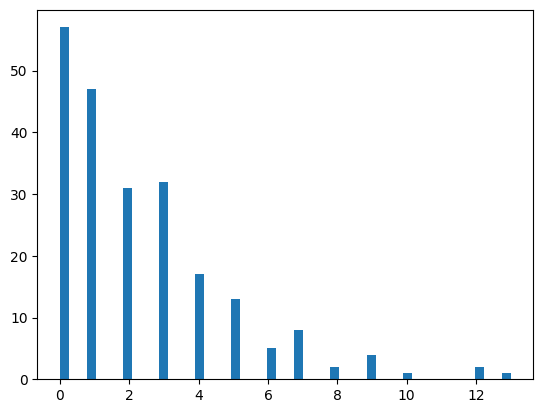

In [17]:
# transcipt counts of a gene: change to list and strip header
sample = list(data.iloc[1])[1:]
plt.hist(sample, bins= 50);

Test bootstrap to see the CI's produced for stationary dist values:

In [18]:
intervals = bootstrap_data([x for x in range(12)], sample, 2000, printing=True)

95% CI for p(0) is: (0.19730941704035873, 0.31390134529147984)
95% CI for p(1) is: (0.15695067264573992, 0.2645739910313901)
95% CI for p(2) is: (0.09417040358744394, 0.18385650224215247)
95% CI for p(3) is: (0.09865470852017937, 0.18834080717488788)
95% CI for p(4) is: (0.04484304932735426, 0.11659192825112108)
95% CI for p(5) is: (0.03139013452914798, 0.08968609865470852)
95% CI for p(6) is: (0.004484304932735426, 0.04484304932735426)
95% CI for p(7) is: (0.013452914798206279, 0.06278026905829596)
95% CI for p(8) is: (0.0, 0.02242152466367713)
95% CI for p(9) is: (0.004484304932735426, 0.03587443946188341)
95% CI for p(10) is: (0.0, 0.013452914798206279)
95% CI for p(11) is: (0.0, 0.0)


Use LP solver to solve LP using bootstrapped data:

In [19]:
def bursty_LP(N, intervals, k0=None, k1=None, M=None):
    """
    Solve bursty LP system to get interval bounds on parameters.

    Inputs:
    N: number of rows of Q / number of equations used
    M: maximum burst size to consider (>= 1)
    intervals: confidence intervals for at least N + 1 states

    Outputs:
    solutions: dict with keys variables, values their solution intervals
    """
    # if max burst not specified: set to the largest burst that appears in Qp = 0 constraint
    if not M:
        M = N - 1

    # create Qr matrices: N rows requires N + 1 columns to include all terms (so (N, N + 1) size)
    # Q1: degradation
    Q1 = (np.diag([-x for x in range(0,N+1)],0) + np.diag([x for x in range(1,N+1)],1))[:-1, :]
    # Q00, Q01, ... : bursting
    Q00 = np.diag([-1 for x in range(0, N + 1)])[:-1, :]
    def Q0(m):
        """m = {1, 2, ...}"""
        return np.diag([1 for x in range(0, N + 1 - m)], -m)[:-1, :]

    # bounds from CI
    pl = [intr[0] for intr in intervals]
    pu = [intr[1] for intr in intervals]

    # define bounds: truncate to N + 1 values as using up to Nth equation
    pl = np.array(pl)[:N + 1]
    pu = np.array(pu)[:N + 1]

    # Construct the problem

    # Variables: specify k1 or k0 manually
    if not k0:
        k0 = cv.Variable()
    if not k1:
        k1 = cv.Variable(1)
    mu = cv.Variable(M)
    z0 = cv.Variable(N + 1)
    z1 = cv.Variable(N + 1)
    y = cv.Variable((N + 1, M))

    # constraints
    constraints = [
        Q1 @ z1 + Q00 @ z0 + sum([Q0(m + 1) @ y[:, m] for m in range(0, M)]) == 0,
        k0 >= 0, k1 >= 0, mu >= 0, z0 >= 0, z1 >= 0, y >= 0,
        k0 * pl <= z0, z0 <= k0 * pu,
        k1 * pl <= z1, z1 <= k1 * pu,
        sum([y[:, m] for m in range(0, M)]) <= z0,
        sum([mu[m] for m in range(0, M)]) <= k0
    ]
    for m in range(0, M):
        constraints +=  [
            mu[m] * pl <= y[:, m], y[:, m] <= mu[m] * pu
        ]

    # solution interval dict
    solutions = {}

    # solver function
    def solver(dict_name, var, solutions):
        # create inteval
        solutions[dict_name] = []
        # min and max objectives
        objective_min = cv.Minimize(var)
        objective_max = cv.Maximize(var)
        # min and max problems
        prob_min = cv.Problem(objective_min, constraints)
        prob_max = cv.Problem(objective_max, constraints)   
        # solve min: add to solution
        result_min = prob_min.solve()#verbose=True)
        try:
            solutions[dict_name].append(var.value.item())
        except:
            solutions[dict_name].append(None)
        # solve max: add to solution
        results_max = prob_max.solve()#verbose=True)
        try:
            solutions[dict_name].append(var.value.item())
        except:
            solutions[dict_name].append(None)
        # add statuses
        solutions[dict_name].append(prob_min.status)
        solutions[dict_name].append(prob_max.status)

    # solve for k0
    if type(k0) == int:
        solutions['k0'] = k0
    else:
        solver('k0', k0, solutions)

    # solve for k1
    if type(k1) == int:
        solutions['k1'] = k1
    else:
        solver('k1', k1, solutions)

    # solve for mu_1, mu_2, ..., mu_M
    for m in range(0, M):
        solver(f'mu_{m + 1}', mu[m], solutions)

    return solutions

{'k0': 1, 'k1': [0.7457627118621069, 2.0000000000072338, 'optimal', 'optimal'], 'mu_1': [-3.9882872850228575e-14, 1.0000000000002656, 'optimal', 'optimal'], 'mu_2': [-3.7483578266378525e-14, 1.000000000000112, 'optimal', 'optimal'], 'mu_3': [-3.0706142646598704e-14, 1.0000000000000777, 'optimal', 'optimal'], 'mu_4': [-2.6527583004926182e-14, 1.0000000000077114, 'optimal', 'optimal'], 'mu_5': [-2.493330738521616e-14, 1.0000000000001135, 'optimal', 'optimal'], 'mu_6': [-2.9743909260121246e-14, 0.6646914589455866, 'optimal', 'optimal'], 'mu_7': [-2.4734754544566058e-14, 0.6646914589519272, 'optimal', 'optimal'], 'mu_8': [-2.662309890116204e-14, 0.4482758621156035, 'optimal', 'optimal'], 'mu_9': [-2.1762944661843637e-14, 0.44827586209502046, 'optimal', 'optimal']}


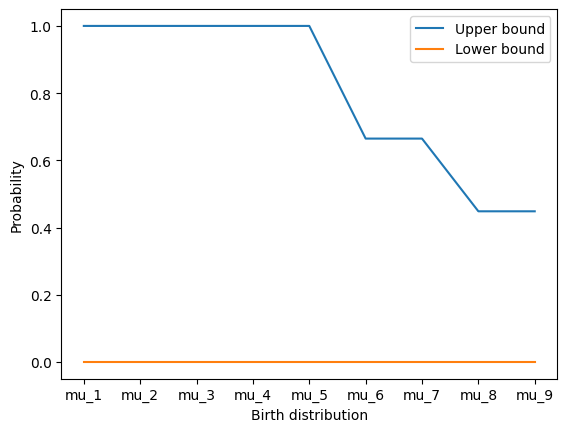

In [21]:
# solve LP using data
# have bounds on p(0), ... ,p(11) so can use up to N=11, but this last equation
# breaks the system so we drop to N=10 (equations n=0, ..., n=N-1) 
N = 10
M = N - 1
solutions_dist = bursty_LP(N, intervals, k0=1)

# extract distribution bounds
labels = [f'mu_{m}' for m in range(1, M + 1)]
lower = [solutions_dist[var][0] for var in labels]
upper = [solutions_dist[var][1] for var in labels]

# plot
plt.plot(labels, upper, label = "Upper bound")
plt.plot(labels, lower, label = "Lower bound")
plt.ylabel("Probability")
plt.xlabel("Birth distribution")
plt.legend()

# print bounds
print(solutions_dist)

Arbitrarily fix one of the parameters, $ k_0 = 1 $, for identifiability. See that we obtain ok bounds of ~[0.75, 2] on $ k_1 $, and that while many distributional bounds are trivial ([0,1]) some of the larger bursts have upper bounds below 1, closer to 0.5.

# Data cleaning

Have ~10,000 rows of genes each with ~200 counts. However, there are many missing values and some genes have very low counts, not giving enough information to analyse.

Following work in (Modelling capture eff. paper) we only take genes that have a mean expression count above 1, over non-missing values, and further discard those that have a large number of missing values.

In [22]:
# select rows with mean above 1
data_2 = data.loc[data.mean(axis=1) > 1]
# leaves ~4000 genes
data_2.shape

(4226, 224)

Text(0.5, 0, 'Missing values in row')

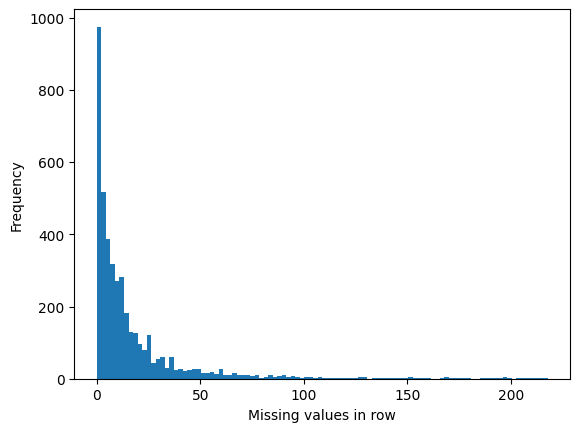

In [23]:
# find number of missing values per row
num_missing = data_2.isna().sum(axis=1)
plt.hist(num_missing, bins=100);
plt.ylabel("Frequency")
plt.xlabel("Missing values in row")

In [24]:
num_missing[num_missing > 50].count()

344

The data has ~200 columns, so rows with more than 50 missing values have more than 25% of data missing. Out of ~4000 columns 344 have missing value counts above this threshold so it seems sensible to discard them.

In [25]:
data_cleaned = data_2[data_2.isna().sum(axis=1) < 50]
data_cleaned.head()

,SS3_MAF_Leo171129_p2_S10,SS3_MAF_Leo171129_p2_S12,SS3_MAF_Leo171129_p2_S13,SS3_MAF_Leo171129_p2_S14,SS3_MAF_Leo171129_p2_S16,SS3_MAF_Leo171129_p2_S17,SS3_MAF_Leo171129_p2_S18,SS3_MAF_Leo171129_p2_S19,SS3_MAF_Leo171129_p2_S1,SS3_MAF_Leo171129_p2_S20,...,SS3_MAF_leo180223_p4_S182,SS3_MAF_leo180223_p4_S186,SS3_MAF_leo180223_p4_S187,SS3_MAF_leo180223_p4_S191,SS3_MAF_leo180223_p4_S185,SS3_MAF_leo180223_p4_S189,SS3_MAF_leo180223_p4_S188,SS3_MAF_leo180223_p4_S190,SS3_MAF_leo180223_p4_S98,SS3_MAF_leo180223_p4_S99
0610007P14Rik,0.0,2.0,2.0,2.0,1.0,4.0,4.0,4.0,7.0,2.0,...,1.0,3.0,0.0,1.0,2.0,9.0,4.0,0.0,0.0,0.0
0610009B22Rik,10.0,4.0,NaN,NaN,0.0,14.0,26.0,6.0,1.0,2.0,...,6.0,5.0,2.0,1.0,14.0,0.0,1.0,4.0,3.0,2.0
0610031J06Rik,17.0,18.0,9.0,14.0,0.0,9.0,6.0,22.0,1.0,10.0,...,18.0,9.0,3.0,2.0,8.0,31.0,15.0,1.0,1.0,2.0
1110007C09Rik,1.0,0.0,4.0,9.0,0.0,0.0,NaN,0.0,NaN,0.0,...,4.0,2.0,NaN,6.0,0.0,0.0,5.0,0.0,2.0,0.0
1110037F02Rik,0.0,0.0,4.0,0.0,2.0,10.0,0.0,2.0,8.0,0.0,...,2.0,4.0,0.0,1.0,4.0,3.0,6.0,0.0,0.0,3.0


# Record cleaned data

Write the cleaned dataset to csv file to be used in analysis script:

In [23]:
# data_cleaned.to_csv("SS3_c57_UMIs_concat_cleaned.csv")

## Test

95% CI for p(0) is: (0.13839285714285715, 0.24107142857142858)
95% CI for p(1) is: (0.0625, 0.14285714285714285)
95% CI for p(2) is: (0.09375, 0.17857142857142858)
95% CI for p(3) is: (0.08035714285714286, 0.16517857142857142)
95% CI for p(4) is: (0.0625, 0.14285714285714285)
95% CI for p(5) is: (0.03125, 0.09375)
95% CI for p(6) is: (0.04017857142857143, 0.10714285714285714)
95% CI for p(7) is: (0.008928571428571428, 0.049107142857142856)
95% CI for p(8) is: (0.017857142857142856, 0.06696428571428571)
95% CI for p(9) is: (0.022321428571428572, 0.08035714285714286)
95% CI for p(10) is: (0.008928571428571428, 0.049107142857142856)
95% CI for p(11) is: (0.0, 0.03125)
95% CI for p(12) is: (0.0, 0.013392857142857142)
95% CI for p(13) is: (0.0, 0.013392857142857142)
95% CI for p(14) is: (0.0, 0.022321428571428572)
95% CI for p(15) is: (0.0, 0.0)
95% CI for p(16) is: (0.0, 0.0)
95% CI for p(17) is: (0.0, 0.013392857142857142)
95% CI for p(18) is: (0.0, 0.0)
95% CI for p(19) is: (0.0, 0.01339

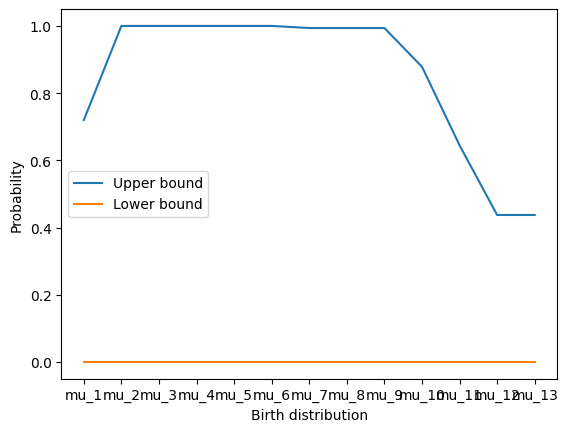

In [27]:
sample_cleaned = list(data_cleaned.iloc[1])
intervals = bootstrap_data([x for x in range(20)], sample_cleaned, 2000, printing=True)
# solve LP using data
N = 14
M = N - 1
solutions_dist = bursty_LP(N, intervals, k0=1)

# extract distribution bounds
labels = [f'mu_{m}' for m in range(1, M + 1)]
lower = [solutions_dist[var][0] for var in labels]
upper = [solutions_dist[var][1] for var in labels]

# plot
plt.plot(labels, upper, label = "Upper bound")
plt.plot(labels, lower, label = "Lower bound")
plt.ylabel("Probability")
plt.xlabel("Birth distribution")
plt.legend()

# print bounds
print(solutions_dist)

# Pipeline for analysis

Given a sample of transcript counts for a gene: bootstrap the data to obtain stationary bounds, solve an LP to bound parameters, plot bounds on distribution of births.

As a first approach compute bounds on all states (counts) that appear in the data, up to the maximum observed x_max, and use as many equations of Qp = 0 as possible where all p's involved are bounded. If this is infeasible (due to randomness in data and bootstrap, exaccerbated by small sample sizes of some states) then drop equations until feasible.

[Corresponds to state space truncation of {0, ... , x_max} where x_max is the largest observed state]

In [28]:
def bound_sample(sample, skip=1, n=1000, N=None, printing=False, plotting=False):
    """
    Given transcript samples from gene, bootstrap and solve LP to bound parameters

    sample: list of up to ~200 counts of transcripts of gene in cells
    skip: number of equations to drop after an infeasible result
    n: number of bootstrap samples
    printing: toggle to print CI's
    plotting: toggle to plot dist bounds
    """
    # find max burst size in sample
    x_max = int(np.nanmax(sample))
    intervals = bootstrap_data([x for x in range(x_max + 1)], sample, n)

    # plot sample hist and threshold
    if plotting:
        plt.hist(sample, bins=50);
        plt.title("Histogram of transcript counts for given gene")
        plt.axvline(x_max, color="red", label=f"Max state {x_max}")
        plt.legend()
        plt.show()
    print("plotted")

    # get bounds on p(0), ..., p(x_max)
    # can use UP TO equation N = x_max, as involves up to p(x_max)
    # allow manual N selection (needs to be <= x_max)
    # equation N involves pi's up to pi_(N-1), so M = N - 1
    if not N:
        N = x_max
    M = N - 1
    
    
    # solve LP using data
    solutions_dist = bursty_LP(N, intervals, k0=1)

    # check if infeasible
    while solutions_dist['mu_1'][2] == 'infeasible':
        if printing: print(f"N = {N} infeasible")
        # try again with smaller N (drop 1 equation)
        N -= skip
        M -= skip
        solutions_dist = bursty_LP(N, intervals, k0=1)
        # stop if too few equations
        if N <= skip + 2:
            break

    if printing: print(f"N = {N} feasible:")

    # plot
    if plotting:
        # extract distribution bounds
        labels = [f'mu_{m}' for m in range(1, M + 1)]
        lower = [solutions_dist[var][0] for var in labels]
        upper = [solutions_dist[var][1] for var in labels]
        plt.plot(labels, upper, label = "Upper bound")
        plt.plot(labels, lower, label = "Lower bound")
        plt.title("LP Bounds on birth distribution")
        plt.ylabel("Probability")
        plt.xlabel("Birth distribution")
        plt.legend()
        plt.show()

    # return bounds
    return solutions_dist

## Test

Perform this method for a selection of samples: showing a histogram of samples and at what point the LP becomes feasible, as well as the final solution bounds:

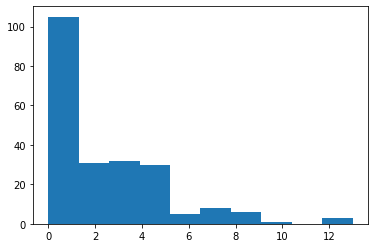

N = 13 infeasible
N = 12 infeasible
N = 11 infeasible
N = 10 feasible:


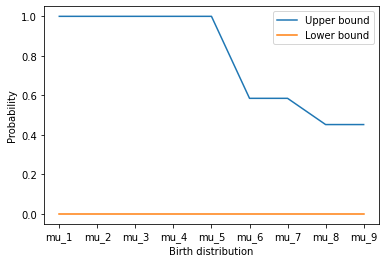

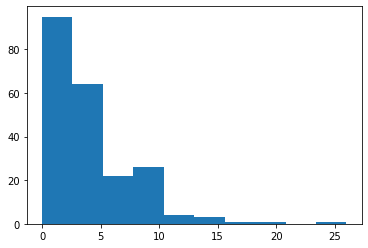

N = 26 feasible:


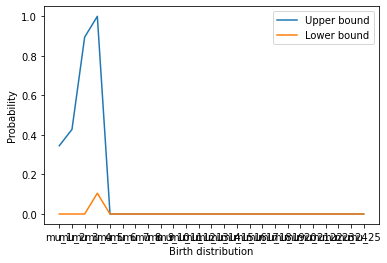

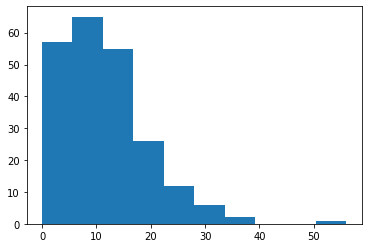

N = 56 feasible:


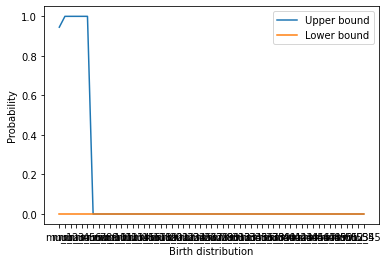

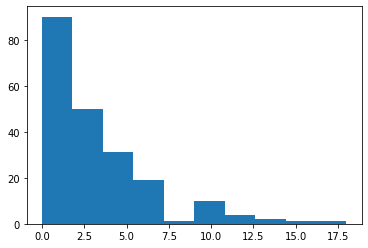

N = 18 infeasible
N = 17 infeasible
N = 16 infeasible
N = 15 infeasible
N = 14 infeasible
N = 13 infeasible
N = 12 infeasible
N = 11 infeasible
N = 10 infeasible
N = 9 infeasible
N = 8 infeasible
N = 7 infeasible
N = 6 infeasible
N = 5 infeasible
N = 4 infeasible
N = 3 feasible:


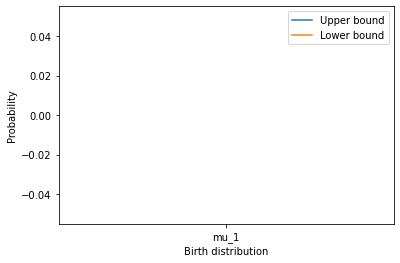

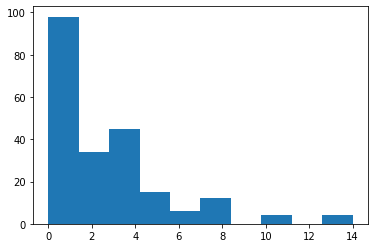

N = 14 infeasible
N = 13 infeasible
N = 12 infeasible
N = 11 infeasible
N = 10 infeasible
N = 9 infeasible
N = 8 feasible:


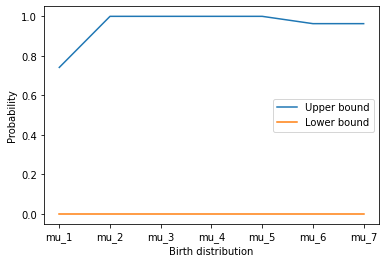

In [40]:
solutions = []
for i in range(5):
    # i th gene transcript counts
    sample = data_cleaned.iloc[i]
    # histogram
    plt.hist(sample);
    plt.show()
    solution = bound_sample(sample, printing=True, plotting=True)
    solutions.append(solution)
    plt.show()

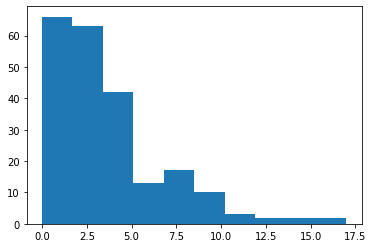

95% CI for p(0) is: (0.06696428571428571, 0.14732142857142858)
95% CI for p(1) is: (0.13839285714285715, 0.24107142857142858)
95% CI for p(2) is: (0.09821428571428571, 0.19196428571428573)
95% CI for p(3) is: (0.09375, 0.18303571428571427)
95% CI for p(4) is: (0.08482142857142858, 0.16964285714285715)
95% CI for p(5) is: (0.03125, 0.09375)
95% CI for p(6) is: (0.03125, 0.09375)
95% CI for p(7) is: (0.017857142857142856, 0.07142857142857142)
95% CI for p(8) is: (0.008928571428571428, 0.05357142857142857)
95% CI for p(9) is: (0.0, 0.03125)
95% CI for p(10) is: (0.013392857142857142, 0.05357142857142857)
95% CI for p(11) is: (0.0, 0.03125)
95% CI for p(12) is: (0.0, 0.013392857142857142)
95% CI for p(13) is: (0.0, 0.013392857142857142)
95% CI for p(14) is: (0.0, 0.0)
95% CI for p(15) is: (0.0, 0.022321428571428572)
95% CI for p(16) is: (0.0, 0.013392857142857142)
95% CI for p(17) is: (0.0, 0.013392857142857142)


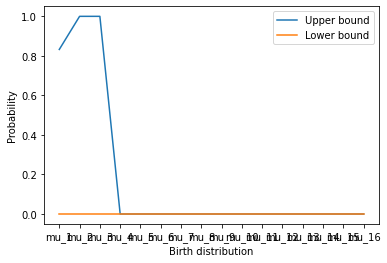

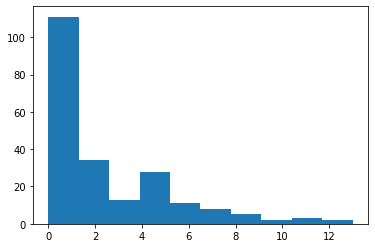

95% CI for p(0) is: (0.24107142857142858, 0.36160714285714285)
95% CI for p(1) is: (0.14285714285714285, 0.24553571428571427)
95% CI for p(2) is: (0.10714285714285714, 0.20089285714285715)
95% CI for p(3) is: (0.026785714285714284, 0.09375)
95% CI for p(4) is: (0.049107142857142856, 0.125)
95% CI for p(5) is: (0.017857142857142856, 0.06696428571428571)
95% CI for p(6) is: (0.022321428571428572, 0.08035714285714286)
95% CI for p(7) is: (0.013392857142857142, 0.0625)
95% CI for p(8) is: (0.004464285714285714, 0.03571428571428571)
95% CI for p(9) is: (0.0, 0.013392857142857142)
95% CI for p(10) is: (0.0, 0.022321428571428572)
95% CI for p(11) is: (0.0, 0.03125)
95% CI for p(12) is: (0.0, 0.013392857142857142)
95% CI for p(13) is: (0.0, 0.013392857142857142)


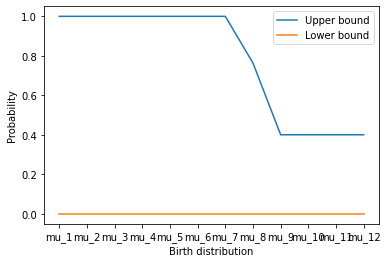

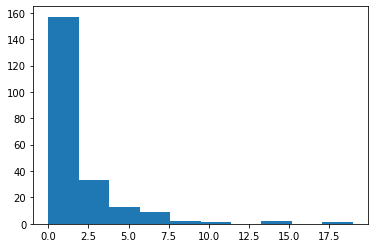

95% CI for p(0) is: (0.46875, 0.5982142857142857)
95% CI for p(1) is: (0.11607142857142858, 0.21428571428571427)
95% CI for p(2) is: (0.05803571428571429, 0.13392857142857142)
95% CI for p(3) is: (0.026785714285714284, 0.08482142857142858)
95% CI for p(4) is: (0.013392857142857142, 0.05803571428571429)
95% CI for p(5) is: (0.008928571428571428, 0.049107142857142856)
95% CI for p(6) is: (0.008928571428571428, 0.049107142857142856)
95% CI for p(7) is: (0.0, 0.03125)
95% CI for p(8) is: (0.0, 0.022321428571428572)
95% CI for p(9) is: (0.0, 0.0)
95% CI for p(10) is: (0.0, 0.0)
95% CI for p(11) is: (0.0, 0.013392857142857142)
95% CI for p(12) is: (0.0, 0.0)
95% CI for p(13) is: (0.0, 0.0)
95% CI for p(14) is: (0.0, 0.013392857142857142)
95% CI for p(15) is: (0.0, 0.013392857142857142)
95% CI for p(16) is: (0.0, 0.0)
95% CI for p(17) is: (0.0, 0.0)
95% CI for p(18) is: (0.0, 0.0)
95% CI for p(19) is: (0.0, 0.013392857142857142)
N = 19 infeasible
N = 18 infeasible
N = 17 infeasible
N = 16 inf

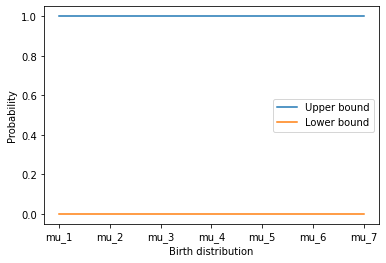

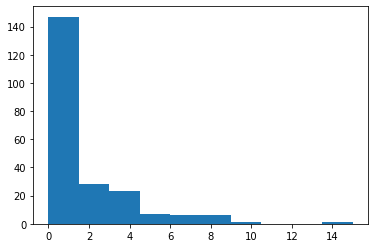

95% CI for p(0) is: (0.29017857142857145, 0.41517857142857145)
95% CI for p(1) is: (0.24107142857142858, 0.36607142857142855)
95% CI for p(2) is: (0.08482142857142858, 0.16964285714285715)
95% CI for p(3) is: (0.017857142857142856, 0.07589285714285714)
95% CI for p(4) is: (0.03125, 0.09375)
95% CI for p(5) is: (0.008928571428571428, 0.05357142857142857)
95% CI for p(6) is: (0.0, 0.022321428571428572)
95% CI for p(7) is: (0.004464285714285714, 0.03571428571428571)
95% CI for p(8) is: (0.008928571428571428, 0.049107142857142856)
95% CI for p(9) is: (0.0, 0.013392857142857142)
95% CI for p(10) is: (0.0, 0.0)
95% CI for p(11) is: (0.0, 0.0)
95% CI for p(12) is: (0.0, 0.0)
95% CI for p(13) is: (0.0, 0.0)
95% CI for p(14) is: (0.0, 0.0)
95% CI for p(15) is: (0.0, 0.013392857142857142)
N = 15 infeasible
N = 14 infeasible
N = 13 infeasible
N = 12 infeasible
N = 11 infeasible
N = 10 infeasible


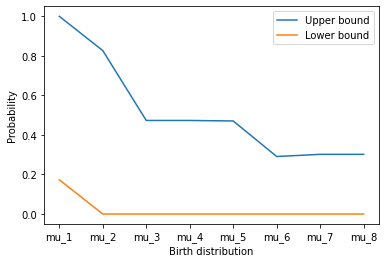

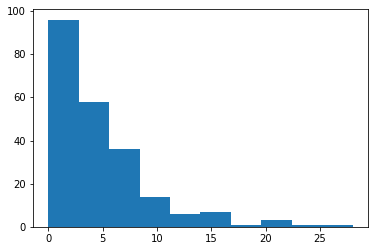

95% CI for p(0) is: (0.13839285714285715, 0.24107142857142858)
95% CI for p(1) is: (0.08928571428571429, 0.17857142857142858)
95% CI for p(2) is: (0.06696428571428571, 0.14285714285714285)
95% CI for p(3) is: (0.0625, 0.13392857142857142)
95% CI for p(4) is: (0.05357142857142857, 0.12946428571428573)
95% CI for p(5) is: (0.04017857142857143, 0.11607142857142858)
95% CI for p(6) is: (0.04017857142857143, 0.10714285714285714)
95% CI for p(7) is: (0.022321428571428572, 0.08035714285714286)
95% CI for p(8) is: (0.017857142857142856, 0.06696428571428571)
95% CI for p(9) is: (0.008928571428571428, 0.0536830357142851)
95% CI for p(10) is: (0.004464285714285714, 0.044642857142857144)
95% CI for p(11) is: (0.0, 0.022321428571428572)
95% CI for p(12) is: (0.004464285714285714, 0.044642857142857144)
95% CI for p(13) is: (0.0, 0.013392857142857142)
95% CI for p(14) is: (0.0, 0.03125)
95% CI for p(15) is: (0.0, 0.03125)
95% CI for p(16) is: (0.0, 0.013392857142857142)
95% CI for p(17) is: (0.0, 0.0

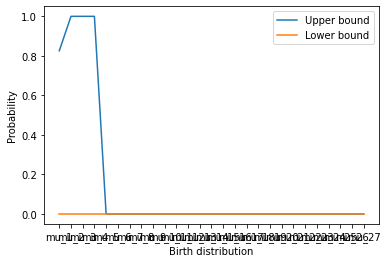

In [135]:
solutions = []
indices = random.sample([x for x in range(data_cleaned.shape[0])], k = 5)
for i in indices:
    # i th gene transcript counts
    sample = data_cleaned.iloc[i]
    # histogram
    plt.hist(sample);
    plt.show()
    solution = bound_sample(sample, printing=True, plotting=True)
    solutions.append(solution)
    plt.show()

N = 15 infeasible
N = 10 infeasible
N = 5 feasible:


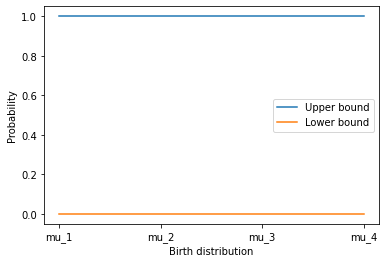

N = 38 infeasible
N = 33 infeasible
N = 28 infeasible
N = 23 infeasible
N = 18 feasible:


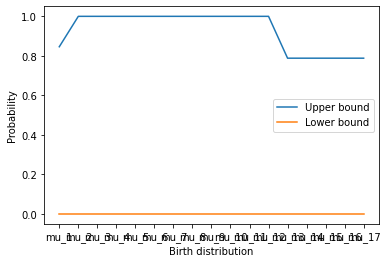

N = 86 infeasible
N = 81 infeasible
N = 76 infeasible
N = 71 infeasible
N = 66 infeasible
N = 61 infeasible
N = 56 infeasible
N = 51 infeasible
N = 46 infeasible
N = 41 infeasible
N = 36 infeasible
N = 31 infeasible
N = 26 infeasible
N = 21 infeasible
N = 16 infeasible
N = 11 feasible:


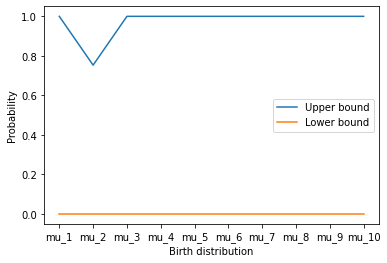

N = 7 feasible:


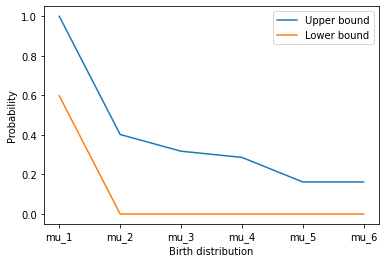

N = 28 infeasible
N = 23 infeasible
N = 18 infeasible
N = 13 infeasible
N = 8 feasible:


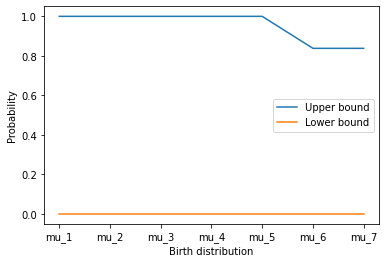

N = 18 infeasible
N = 13 infeasible
N = 8 infeasible
N = 3 feasible:


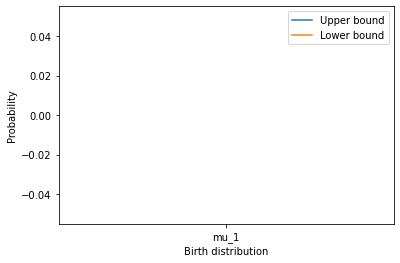

N = 19 infeasible
N = 14 infeasible
N = 9 feasible:


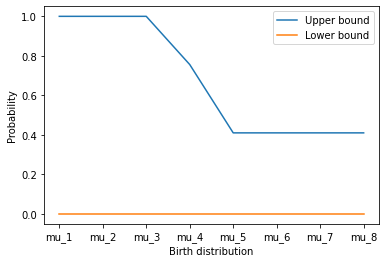

N = 22 infeasible
N = 17 infeasible
N = 12 infeasible
N = 7 feasible:


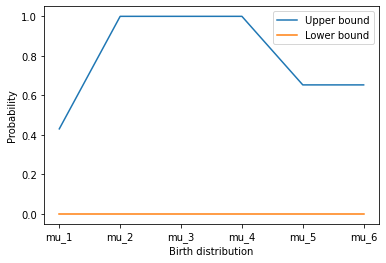

N = 15 infeasible
N = 10 feasible:


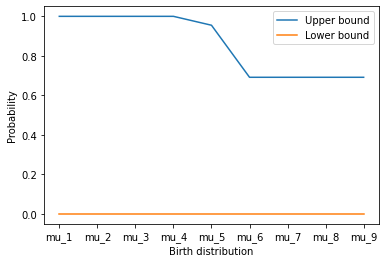

N = 30 infeasible
N = 25 infeasible
N = 20 infeasible
N = 15 feasible:


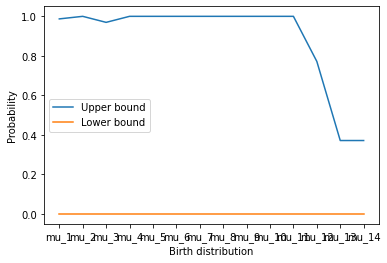

N = 51 feasible:


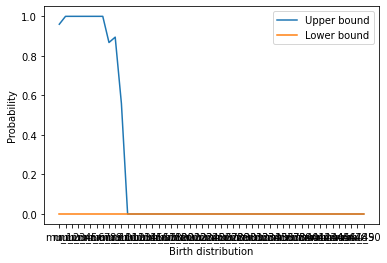

N = 11 infeasible
N = 6 feasible:


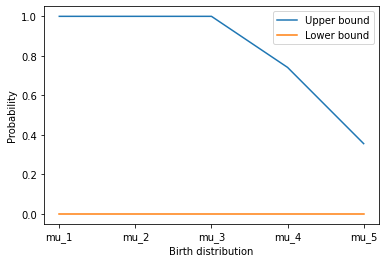

N = 53 infeasible
N = 48 infeasible
N = 43 infeasible
N = 38 infeasible
N = 33 infeasible
N = 28 feasible:


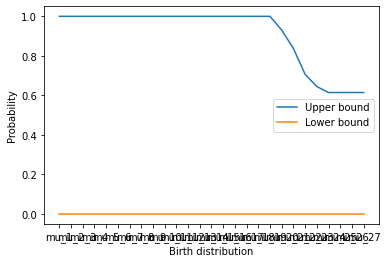

N = 8 feasible:


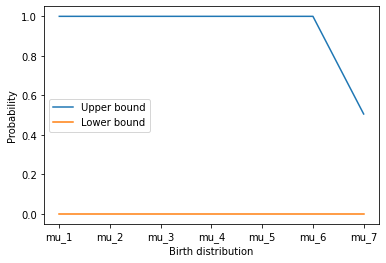

N = 36 feasible:


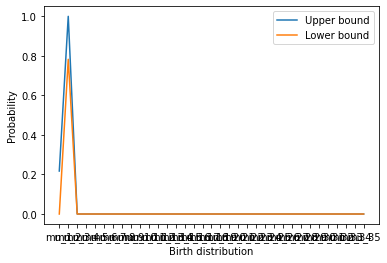

N = 14 infeasible
N = 9 feasible:


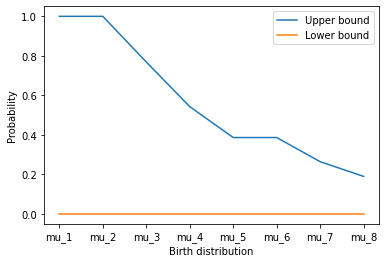

N = 8 feasible:


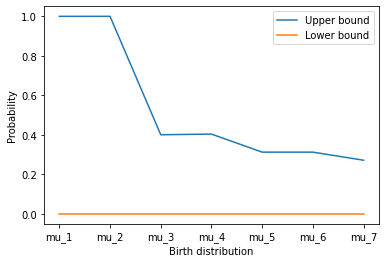

N = 56 feasible:


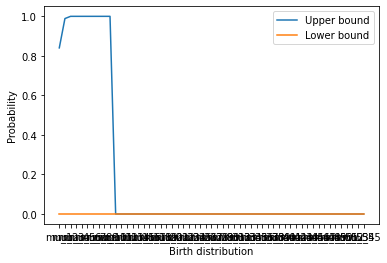

N = 15 feasible:


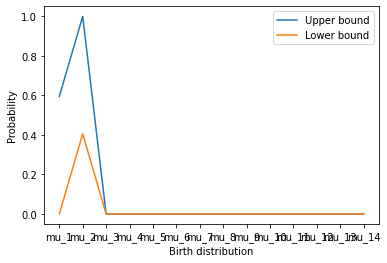

N = 59 feasible:


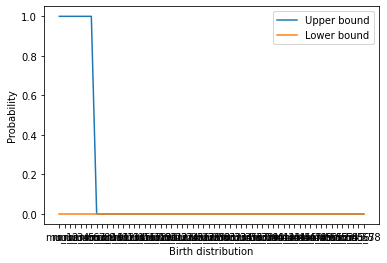

In [185]:
solutions = []
indices = random.sample([x for x in range(data_cleaned.shape[0])], k = 20)
for i in indices:
    # i th gene transcript counts
    sample = data_cleaned.iloc[i]
    solution = bound_sample(sample, skip=5, n=5000, plotting=True, printing=True)
    solutions.append(solution)
    plt.show()

## Effects of including unreliable data

Worse results by including innaccurate CI's , while still remaining feasible:

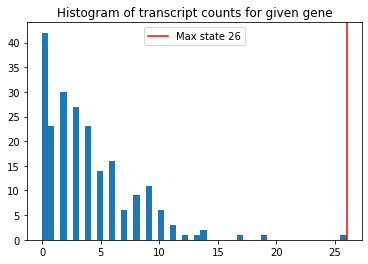

plotted
N = 26 feasible:


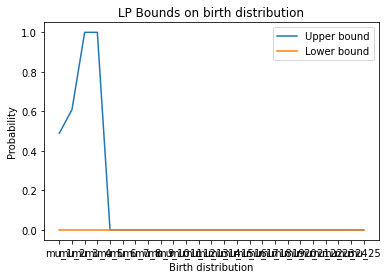

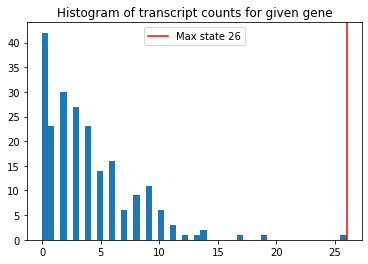

plotted
N = 14 feasible:


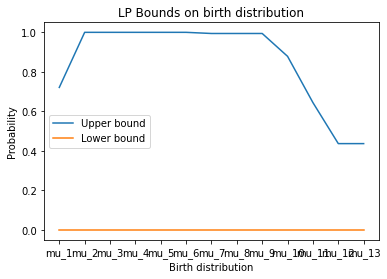

In [14]:
sample = data_cleaned.iloc[1]
solution = bound_sample(sample, printing=True, plotting=True)
solution_trunc = bound_sample(sample, N=14, printing=True, plotting=True)

First dist. plot above uses bounds computed on all available data, even states 15 - 26 which have few observations and so likely produce unreliable CI bounds. Using N=26 equations (all equations that can be bounded using the data) the LP is feasible, but the results suggest a very sharp peaked birth distribution that drops to zero for moderate bursts.

The second dist. plot uses a manually selected N=15 equations, which only use bounds on states 0 - 15: these states have sufficient observations to suggest reliable CIs. The results give a much higher upper bound for the distribution (although we can only bound fewer terms) and suggest a more spread distribution of burst sizes, that tails off for larger bursts.

(The repeated histograms are for the obserations of states in the sample)



# Results

Overall gives reasonable bounds on the birth distribution for some samples. Other samples either give uninformative bounds i.e [0,1] across dist. or remain infeasible for model. However, this is to be expected with data due to small sample sizes and the data collection process (counts of transcripts recorded are a small proportion of the true value).

A main drawback is the time taken: the histogram of samples shows there is often a long right tail of states with very few observartions, these lead to innacurate CI's (not containing the true value) (especially in the case of states with no observations that give CI = (0,0)) which usually leads to infeasible LP's. Dropping equations (equiv. states) one by one takes time to drop this tail of states.

Additionally, even if the LP is feasible, including these states (with low observation numbers and likely innacurate CI's) can cause poor solution bounds that may be incorrect. [See above]

A better approach would be to select beforehand states {0, ..., x} that have a reasonable number of samples, giving confidence that the bounds produced by CI's are accurate.

# Better methods to choose states / equations

So far have taken each gene's transcript samples and computed bounds on stationary distribution values for all states, up to the max observed value. Then used as many equations and burst probabilities as equations can be bounded, dropping equations one by one in the infeasible case.

However, this is slow, can lead to poor results and is not practical for analysing ~4000 genes.

### Threshold

Instead consider only using bounds on p(x)'s when the number of times x occurs in the sample is above a given threshold, e.g. 5. This means only using CI bounds that are somewhat reliable, and hopefully leading to majority feasible LP's and accurate results:

In [29]:
def bound_sample_threshold(sample, threshold=5, skip=1, n=1000, N=None, 
                           plot_sample=True, print_bounds=False, 
                           print_status=True, plot_solution=True):
    """
    Given transcript samples from gene, bootstrap and solve LP to bound parameters

    sample: list of up to ~200 counts of transcripts of gene in cells
    threshold: minimum number of occurances in sample needed to include state x
            set to zero to use up to max state available
    skip: number of equations to drop after an infeasible result
    n: number of bootstrap samples
    N: option to manually specify number of equations used
    settings:
    plot_sample: toggle histogram of sample
    print_bounds: toggle printing CI bounds
    print_status: toggle printing feasible/infeasible reports
    plot_solution: toggle plotting solution bounds on distribution
    """

    # find max burst size in sample
    x_max = int(np.nanmax(sample))

    # dict of states and occurances in sample
    counts = sample.value_counts().to_dict()
    x_max_thresh = x_max
    # look at all states up to max
    for x in range(x_max + 1):
        if x in counts:
            # check for first state with < threshold occurance
            if counts[x] < threshold:
                # get previous state
                x_max_thresh = x - 1
                break
        # if not in count: 0 occurances, below threshold (unless = 0)
        elif threshold > 0:
            x_max_thresh = x - 1
            break

    # edge case: need at least bounds up to p(2) to estimate pi_1
    if x_max_thresh < 2:
        print("Edge case")
        x_max_thresh = 2
     
    # plot sample hist and threshold
    if plot_sample:
        plt.hist(sample, bins=x_max);
        plt.title("Histogram of transcript counts for given gene")
        plt.axhline(threshold, 0, 1, color="orange", label=f"threshold {threshold}")
        plt.axvline(x_max, color="red", label=f"Max state {x_max}")
        plt.axvline(x_max_thresh, color="red", label=f"Threshold state {x_max_thresh}")
        plt.legend()
        plt.show()
    
    # compute p(0), ... , p(x_max_thresh) bounds
    intervals = bootstrap_data([x for x in range(x_max_thresh + 1)], sample, n, printing=print_bounds)

    # get bounds on p(0), ..., p(x_max_thresh)
    # can use UP TO equation N = x_max_thresh, as involves up to p(x_max_thresh)
    # equation N involves pi's up to pi_(N-1), so M = N - 1
    if not N:
        N = x_max_thresh
        M = N - 1
    
    # solve LP using data
    solutions_dist = bursty_LP(N, intervals, k0=1)

    # check if infeasible
    while solutions_dist['mu_1'][2] == 'infeasible':
        if print_status: print(f"N = {N} infeasible")
        # try again with smaller N (drop 'skip' # of equations)
        N -= skip
        M -= skip
        solutions_dist = bursty_LP(N, intervals, k0=1)
        # stop if too few equations
        if N <= skip + 2:
            break

    if print_status: print(f"N = {N} feasible:")

    # plot
    if plot_solution:
        # extract distribution bounds
        labels = [f'mu_{m}' for m in range(1, M + 1)]
        lower = [solutions_dist[var][0] for var in labels]
        upper = [solutions_dist[var][1] for var in labels]
        plt.plot(labels, upper, label = "Upper bound")
        plt.plot(labels, lower, label = "Lower bound")
        plt.title("LP Bounds on birth distribution")
        plt.ylabel("Probability")
        plt.xlabel("Birth distribution")
        plt.legend()
        plt.show()

    # return bounds
    return solutions_dist

### Comparison of methods

Note that a threshold of 0 samples will use bounds on all states up to the maximum observed, regardless of occurances of states in samples

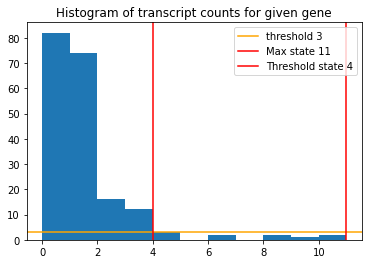

N = 4 feasible:


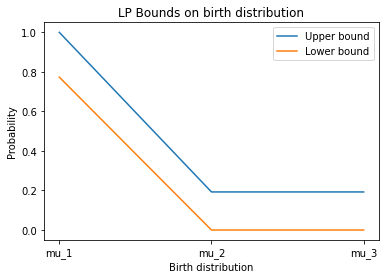

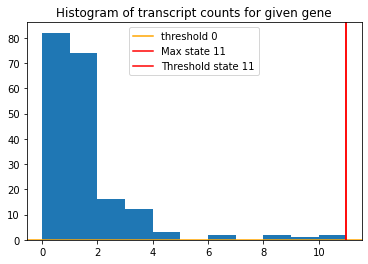

N = 11 feasible:


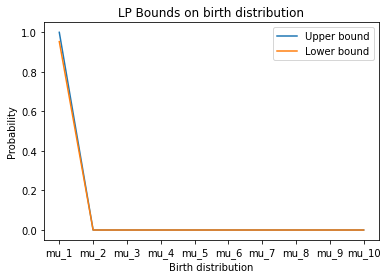

In [50]:
for i in random.sample([x for x in range(data_cleaned.shape[0])], k = 1):
    sample = data_cleaned.iloc[i]
    solution_threshold = bound_sample_threshold(sample, threshold=3)
    solution_naive = bound_sample_threshold(sample, threshold=0)

Setting a low threshold e.g. 3, on occurances of states in the sample discards states with confidence intervals are are likely to be unreliable. 

In the above example a threshold of 3 restricts us to using bounds on states {0, 1, 2, 3, 4} allowing the use of 4 equations to estimate $ \pi_1, \pi_2 $ and $ \pi_3 $. These states have many occurances in the sample and so provide good CI bounds that give great bounds on the distribution of bursts.

However, with no threshold and using bounds on all states {0, ... , 11} we can use 11 equations to estimate $ \pi_1, \cdots ,\pi_{10} $, but many states have low/no occruances in the sample and so provide extremely unreliable CI's that give very poor and likely incorrect distribution bounds.

# Apply method to data

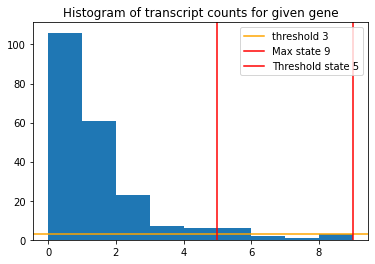

N = 5 feasible:


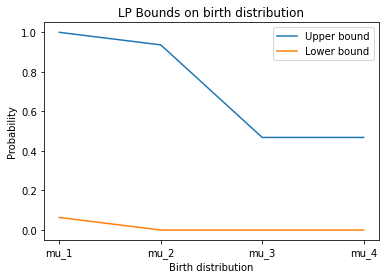

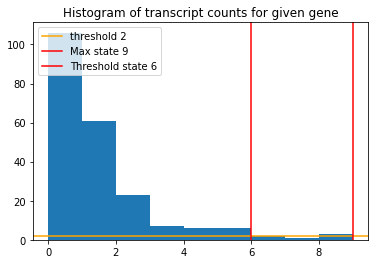

N = 6 feasible:


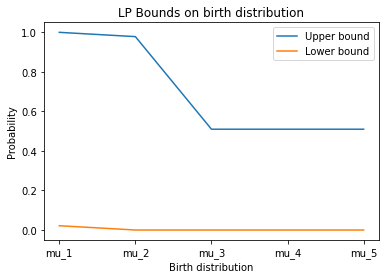

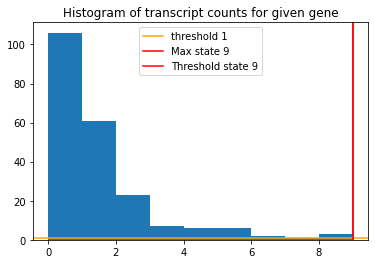

N = 9 feasible:


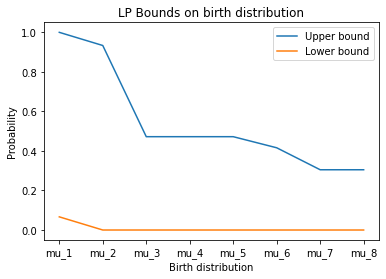

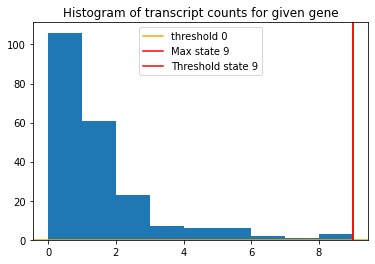

N = 9 feasible:


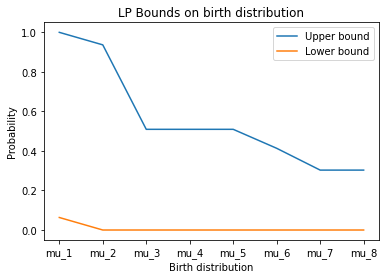

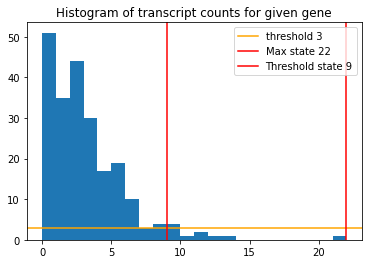

N = 9 feasible:


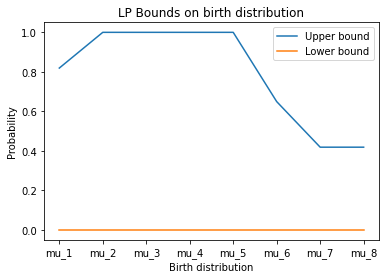

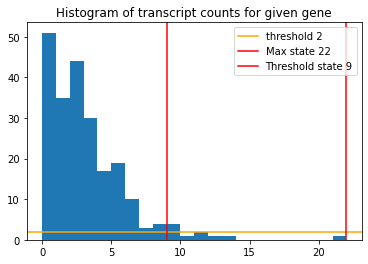

N = 9 feasible:


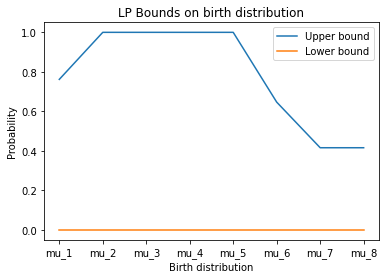

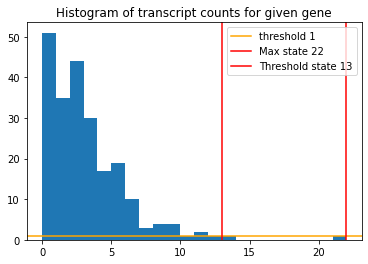

N = 13 feasible:


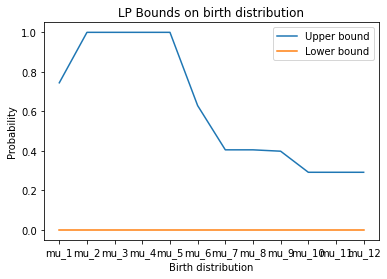

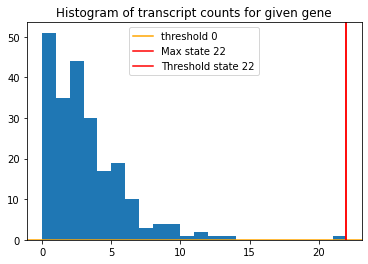

N = 22 feasible:


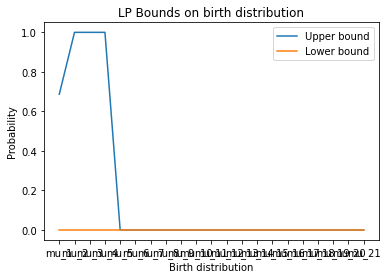

In [19]:
rng = np.random.default_rng(66)
for i in rng.choice(data_cleaned.shape[0], size = 2):
    sample = data_cleaned.iloc[i]
    solution_threshold = bound_sample_threshold(sample, threshold=3)
    solution_threshold = bound_sample_threshold(sample, threshold=2)
    solution_threshold = bound_sample_threshold(sample, threshold=1)
    solution_naive = bound_sample_threshold(sample, threshold=0)

## Quantiles of the sample

Low observation counts of small states can lead to thresholding only using a few states, allowing estimation of only a few parameters, when there may be enough data to estimate more.

Consider finding quantiles (~ % of the data) and using states up to this point, using the majority of the data in the sample while hopefully avoiding unreliable, low observation states:

In [18]:
def bound_sample_quantile(sample, q=0.75, skip=1, n=1000, N=None, 
                           plot_sample=True, print_bounds=False, 
                           print_status=True, plot_solution=True):
    """
    Given transcript samples from gene, bootstrap and solve LP to bound parameters

    sample: list of up to ~200 counts of transcripts of gene in cells
    q: % quantile of sample where the state space will be truncated to,
        set to 1 to use all available states
    skip: number of equations to drop after an infeasible result
    n: number of bootstrap samples
    N: option to manually specify number of equations used
    settings:
    plot_sample: toggle histogram of sample
    print_bounds: toggle printing CI bounds
    print_status: toggle printing feasible/infeasible reports
    plot_solution: toggle plotting solution bounds on distribution
    """

    # find q-quantile of sample (ignore missing values)
    x_max_q = int(np.nanquantile(sample, q))

    # find max burst size in sample
    x_max = int(np.nanmax(sample))

    # edge case: need at least bounds up to p(2) to estimate pi_1
    if x_max_q < 2:
        print("Edge case")
        x_max_q = 2
    
    # plot sample hist and threshold
    if plot_sample:
        plt.hist(sample, bins=x_max);
        plt.title("Histogram of transcript counts for given gene")
        plt.axvline(x_max, color="red", label=f"Max state {x_max}")
        plt.axvline(x_max_q, color="red", label=f"qth quantile state {x_max_q}")
        plt.legend()
        plt.show()
    
    # compute p(0), ... , p(x_max_q) bounds
    intervals = bootstrap_data([x for x in range(x_max_q + 1)], sample, n, printing=print_bounds)

    # get bounds on p(0), ..., p(x_max_q)
    # can use UP TO equation N = x_max_q, as involves up to p(x_max_q)
    # equation N involves pi's up to pi_(N-1), so M = N - 1
    if not N:
        N = x_max_q
        M = N - 1
    
    # solve LP using data
    solutions_dist = bursty_LP(N, intervals, k0=1)

    # check if infeasible
    while solutions_dist['mu_1'][2] == 'infeasible':
        if print_status: print(f"N = {N} infeasible")
        # try again with smaller N (drop 1 equation)
        N -= skip
        M -= skip
        solutions_dist = bursty_LP(N, intervals, k0=1)
        # stop if too few equations
        if N <= skip + 2:
            break

    if print_status: print(f"N = {N} feasible:")

    # plot
    if plot_solution:
        # extract distribution bounds
        labels = [f'mu_{m}' for m in range(1, M + 1)]
        lower = [solutions_dist[var][0] for var in labels]
        upper = [solutions_dist[var][1] for var in labels]
        plt.plot(labels, upper, label = "Upper bound")
        plt.plot(labels, lower, label = "Lower bound")
        plt.title("LP Bounds on birth distribution")
        plt.ylabel("Probability")
        plt.xlabel("Birth distribution")
        plt.legend()
        plt.show()

    # return bounds
    return solutions_dist

### Test

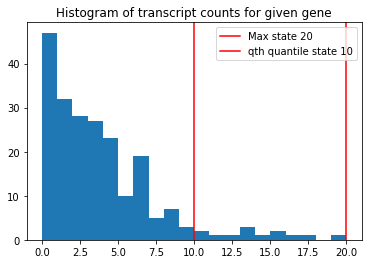

N = 10 feasible:


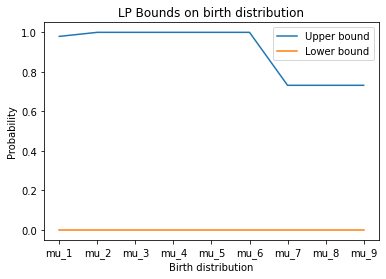

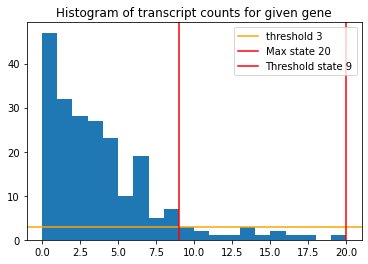

N = 9 feasible:


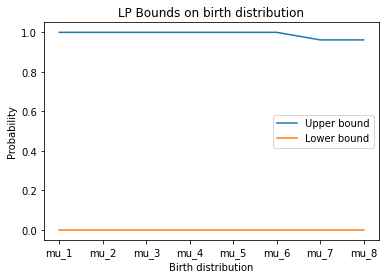

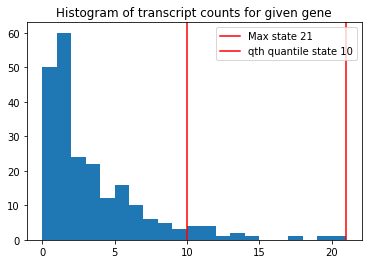

N = 10 feasible:


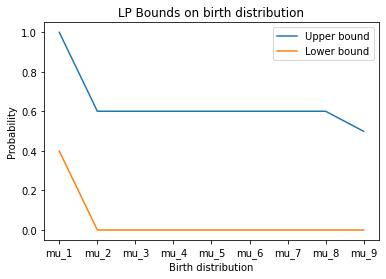

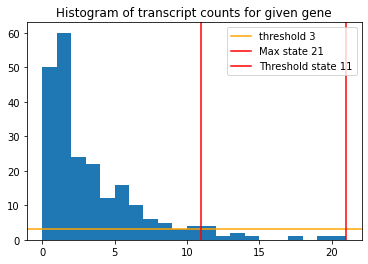

N = 11 feasible:


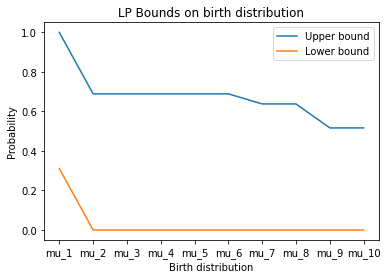

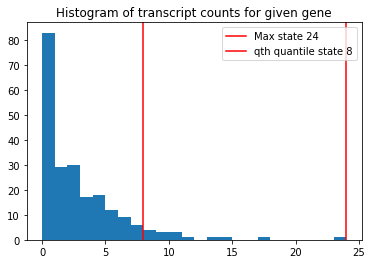

N = 8 feasible:


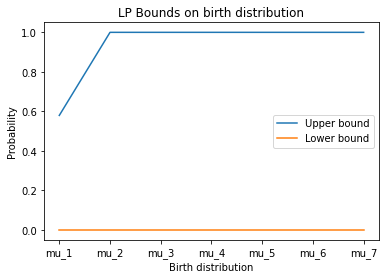

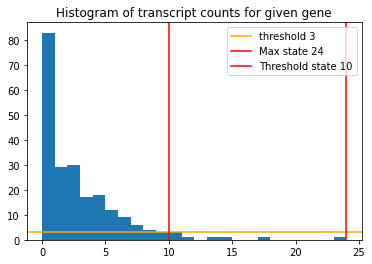

N = 10 feasible:


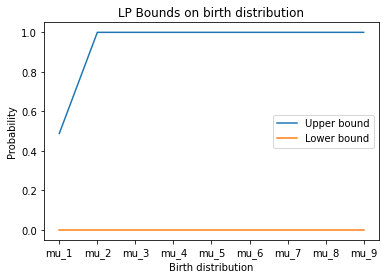

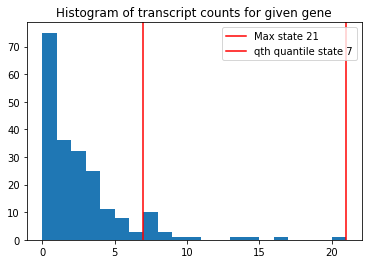

N = 7 feasible:


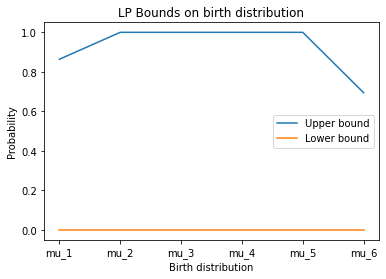

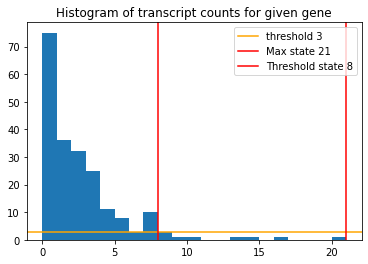

N = 8 feasible:


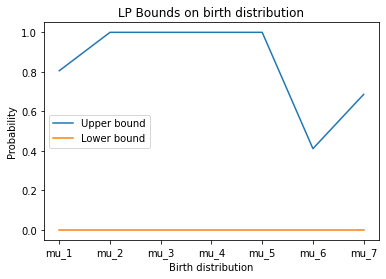

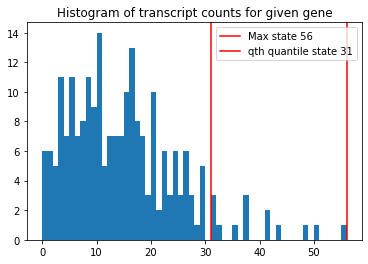

N = 31 infeasible
N = 30 infeasible
N = 29 feasible:


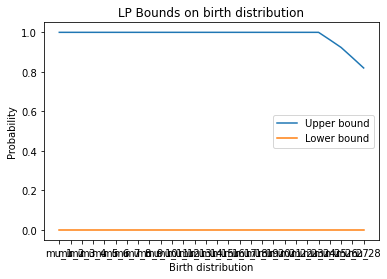

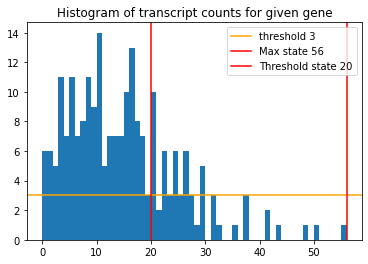

N = 20 feasible:


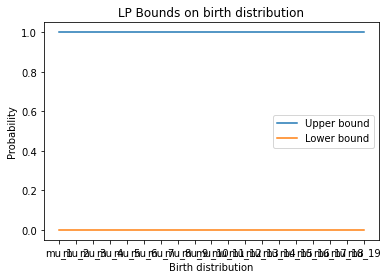

In [69]:
rng = np.random.default_rng(20)
for i in rng.choice(data_cleaned.shape[0], size = 5):
    sample = data_cleaned.iloc[i]
    solution_quantile = bound_sample_quantile(sample, q=0.95)
    solution_threshold = bound_sample_threshold(sample, threshold=3)

# Results

Unfortunately, does not seem to be any benefit from using quantiles. Even in the idea use case when there is a 'break' in the histogram, with a small state having a low number of observations using quantiles to include states past this just includes this unreliable CI, and so does no better (reducing due to infeasible) than thresholding, or even leads to feasible nonsense solutions.

In standard cases a very high quantile is needed, as almost all states up to the max have enough observations to be reliable, and even in other cases 95%+ is needed to use most of the data, with a very fine line to including unreliable tail states as q -> 1.

# Method 3

As in method 1 use a threshold on the minimum number of observations of a state in the sample, and compute bootstrap CI's for the respective stationary probabilities. 

However, for a state x with too few observations, while the CI may not be reliable enough to bound the p(x), we can still bound in [0,1]. This bound is uninformative, but allows use use of further states that may have useful information.

This is especially important if the sample has no observations of states 0, 1, 2... as these first states appear in all equations and so need to be bounded.

### However,

[0,1] bounds are uninformative, and so may not give much extra information. 

In [30]:
def bound_sample_threshold_uninformed(sample, threshold=5, skip=1, n=1000, N=None, 
                           plot_sample=True, print_bounds=False, 
                           print_status=True, plot_solution=True):
    """
    Given transcript samples from gene, bootstrap and solve LP to bound parameters

    sample: list of up to ~200 counts of transcripts of gene in cells
    threshold: minimum number of occurances in sample needed to include state x
            set to zero to use up to max state available
    skip: number of equations to drop after an infeasible result
    n: number of bootstrap samples
    N: option to manually specify number of equations used
    settings:
    plot_sample: toggle histogram of sample
    print_bounds: toggle printing CI bounds
    print_status: toggle printing feasible/infeasible reports
    plot_solution: toggle plotting solution bounds on distribution
    """

    # find max burst size in sample
    x_max = int(np.nanmax(sample))

    # compute all possible bounds: p(0), ... , p(x_max)
    intervals = bootstrap_data([x for x in range(x_max + 1)], sample, n, printing=print_bounds)

    # dict of states and occurances in sample
    counts = sample.value_counts().to_dict()

    # for each state up to x_max:
    # above threshold # observations => use CI
    # below => use [0,1] bounds
    # track [0,1] bounded states
    non_bounds = []
    for x in range(x_max + 1):
        if x in counts:
            # below
            if counts[x] < threshold:
                # [0,1] bounds
                intervals[x] = np.array([0.0, 1.0])
                non_bounds.append(x)
        # if not in count: 0 occurances, below threshold (unless = 0)
        elif threshold > 0:
            intervals[x] = np.array([0.0, 1.0])
            non_bounds.append(x)
     
    # plot sample hist and threshold
    if plot_sample:
        plt.hist(sample, bins=x_max);
        plt.title("Histogram of transcript counts for given gene")
        plt.axhline(threshold, 0, 1, color="orange", label=f"threshold {threshold}")
        plt.axvline(x_max, color="red", label=f"Max state {x_max}")
        for x in non_bounds:
            plt.axvline(x, color="green")
        plt.legend()
        plt.show()

    # get bounds on p(0), ..., p(x_max)
    # can use UP TO equation N = x_max, as involves up to p(x_max)
    # equation N involves pi's up to pi_(N-1), so M = N - 1
    if not N:
        N = x_max
        M = N - 1
    
    # solve LP using data
    solutions_dist = bursty_LP(N, intervals, k0=1)

    # check if infeasible
    while solutions_dist['mu_1'][2] == 'infeasible':
        if print_status: print(f"N = {N} infeasible")
        # try again with smaller N (drop 'skip' # of equations)
        N -= skip
        M -= skip
        solutions_dist = bursty_LP(N, intervals, k0=1)
        # stop if too few equations
        if N <= skip + 2:
            break

    if print_status: print(f"N = {N} feasible:")

    # plot
    if plot_solution:
        # extract distribution bounds
        labels = [f'mu_{m}' for m in range(1, M + 1)]
        lower = [solutions_dist[var][0] for var in labels]
        upper = [solutions_dist[var][1] for var in labels]
        plt.plot(labels, upper, label = "Upper bound")
        plt.plot(labels, lower, label = "Lower bound")
        plt.title("LP Bounds on birth distribution")
        plt.ylabel("Probability")
        plt.xlabel("Birth distribution")
        plt.legend()
        plt.show()

    # return bounds
    return solutions_dist

# Test

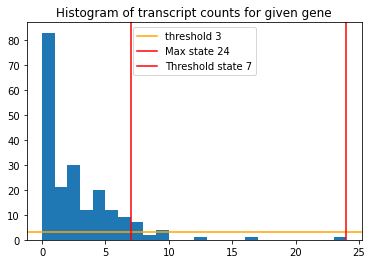

N = 7 feasible:


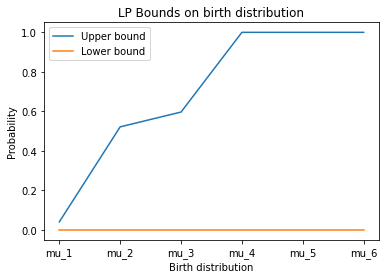

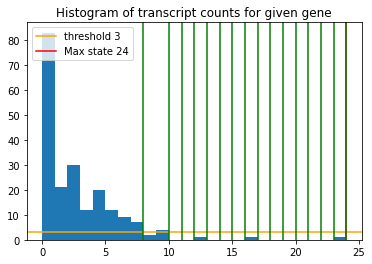

N = 24 feasible:


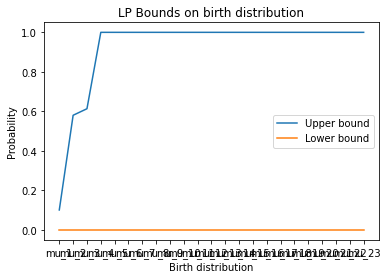

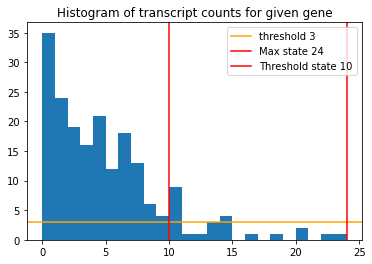

N = 10 feasible:


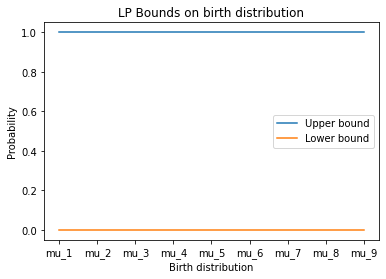

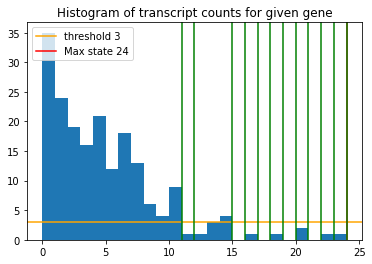

N = 24 feasible:


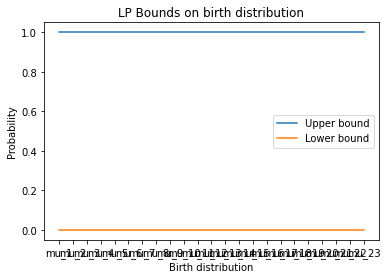

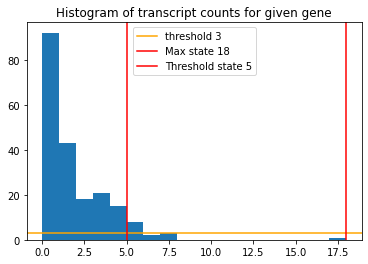

N = 5 feasible:


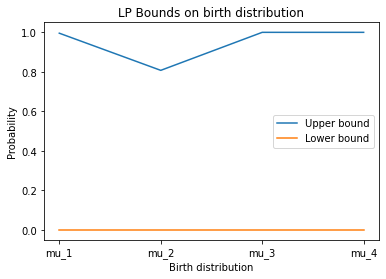

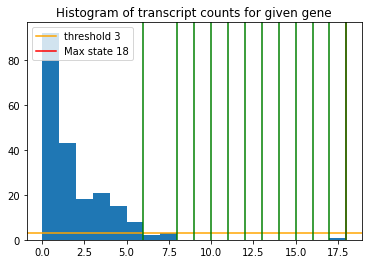

N = 18 feasible:


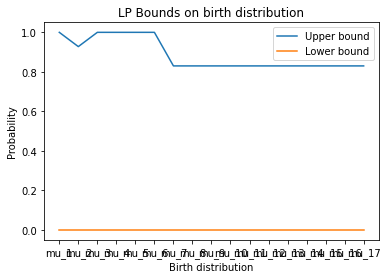

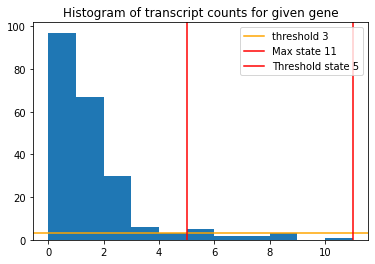

N = 5 feasible:


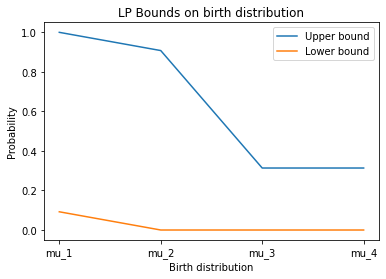

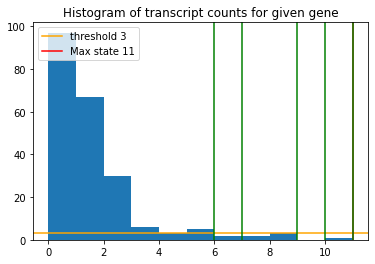

N = 11 feasible:


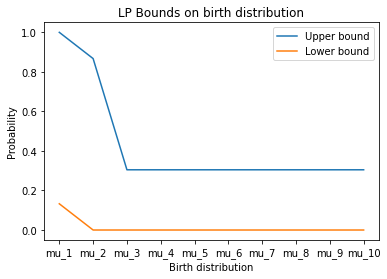

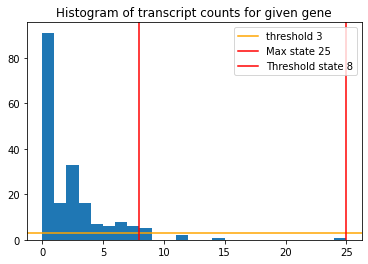

N = 8 infeasible
N = 7 infeasible
N = 6 infeasible
N = 5 infeasible
N = 4 infeasible
N = 3 feasible:


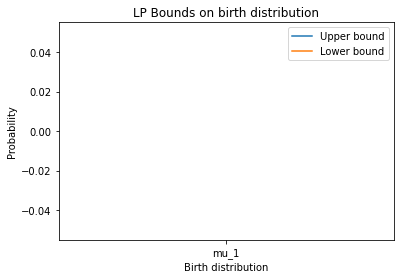

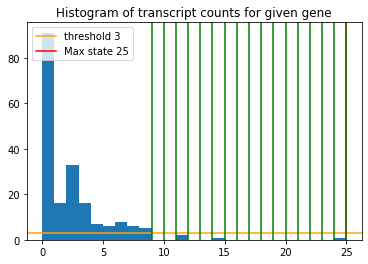

N = 25 infeasible
N = 24 infeasible
N = 23 infeasible
N = 22 infeasible
N = 21 infeasible
N = 20 infeasible
N = 19 infeasible
N = 18 infeasible
N = 17 infeasible
N = 16 infeasible
N = 15 infeasible
N = 14 infeasible
N = 13 infeasible
N = 12 infeasible
N = 11 infeasible
N = 10 infeasible
N = 9 infeasible
N = 8 infeasible
N = 7 infeasible
N = 6 infeasible
N = 5 infeasible
N = 4 infeasible
N = 3 feasible:


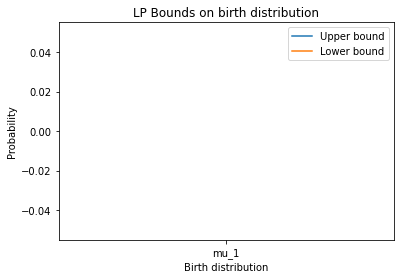

Edge case


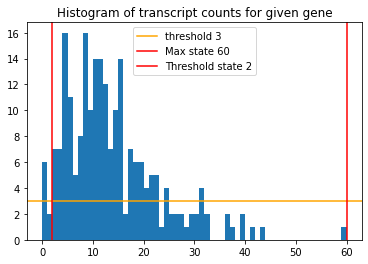

N = 2 feasible:


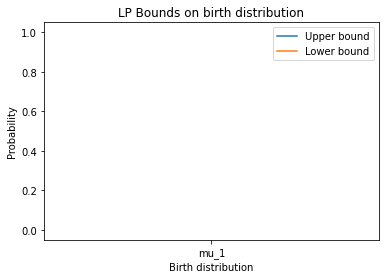

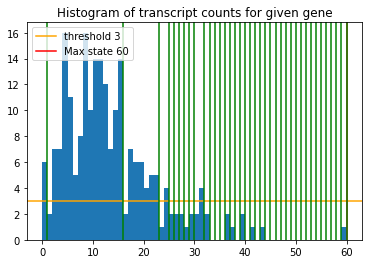

N = 60 feasible:


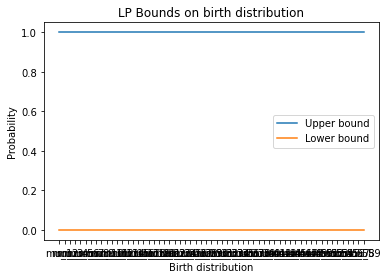

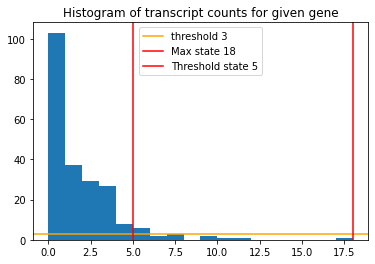

N = 5 feasible:


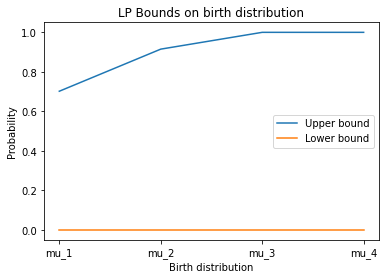

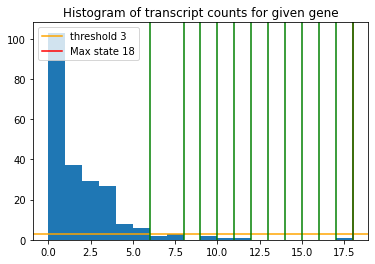

N = 18 feasible:


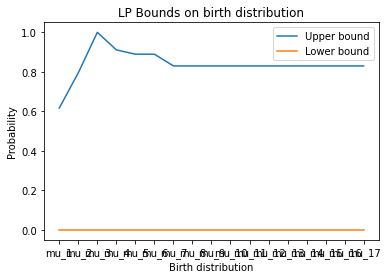

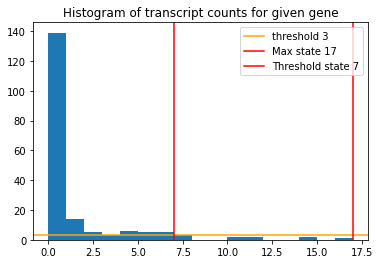

N = 7 feasible:


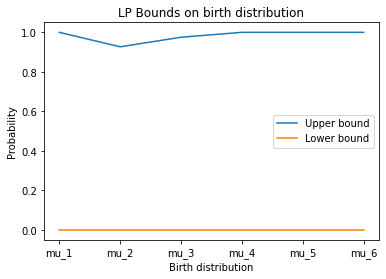

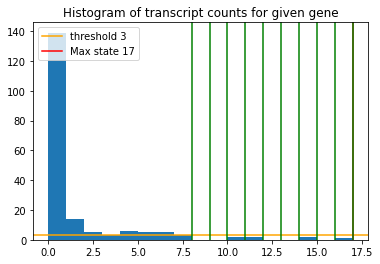

N = 17 feasible:


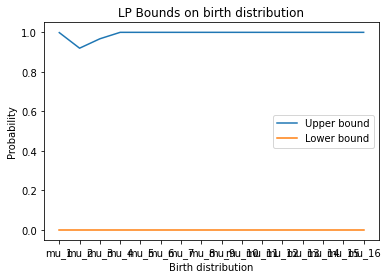

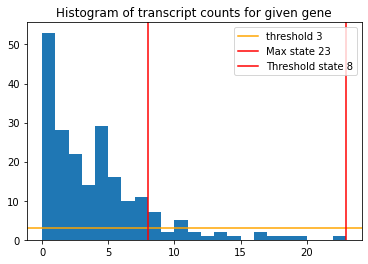

N = 8 feasible:


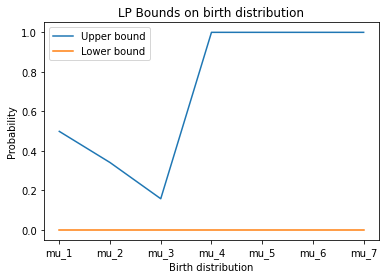

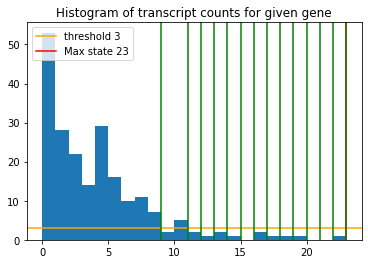

N = 23 feasible:


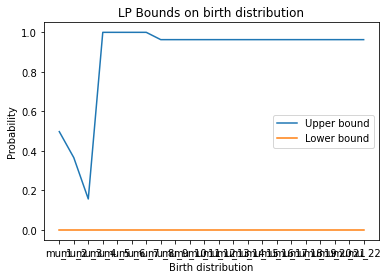

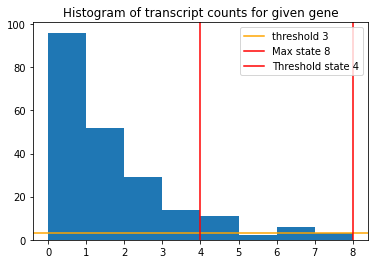

N = 4 feasible:


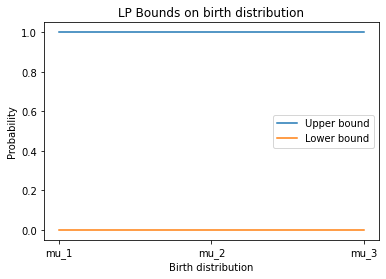

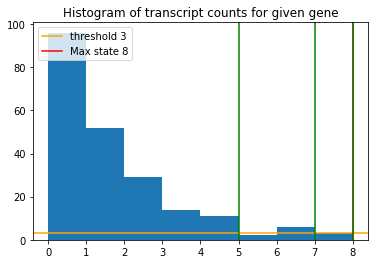

N = 8 feasible:


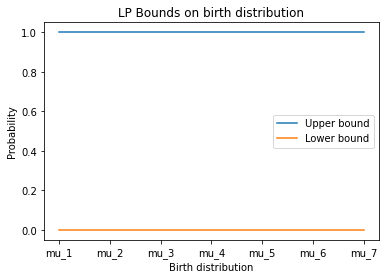

In [24]:
rng = np.random.default_rng(352)
for i in rng.choice(data_cleaned.shape[0], size = 10):
    sample = data_cleaned.iloc[i]
    solution_threshold = bound_sample_threshold(sample, threshold=3)
    solution_threshold_uni = bound_sample_threshold_uninformed(sample, threshold=3)

See that using [0,1] bounds can improve the quality of solution bounds, especially when a single state in the middle of the data has observations below the treshold, allowing more equations to be used.

However, including [0,1] bounds on states in the tail all the way up to the maximum observed state does not give a noticable improvment, and simply leads to increased computation time.

Therefore, we refine the method to consider states up to the maximum state that has more than theshold number of observations, replacing CI's for any smaller states that have observation counts below the threshold by [0,1] bounds:

In [31]:
def bound_sample_refined(sample, threshold=5, skip=1, n=1000, N=None, 
                         plot_sample=True, print_bounds=False, 
                         print_status=True, plot_solution=True):
    """
    Given transcript samples from gene, bootstrap and solve LP to bound parameters

    sample: list of up to ~200 counts of transcripts of gene in cells
    threshold: minimum number of occurances in sample needed to include state x
            set to zero to use up to max state available
    skip: number of equations to drop after an infeasible result
    n: number of bootstrap samples
    N: option to manually specify number of equations used
    settings:
    plot_sample: toggle histogram of sample
    print_bounds: toggle printing CI bounds
    print_status: toggle printing feasible/infeasible reports
    plot_solution: toggle plotting solution bounds on distribution
    """

    # find max burst size in sample
    x_max = int(np.nanmax(sample))

    # compute all possible bounds: p(0), ... , p(x_max)
    intervals = bootstrap_data([x for x in range(x_max + 1)], sample, n, printing=print_bounds)

    # dict of states and occurances in sample
    counts = sample.value_counts().to_dict()

    # find max state with more than threshold occurances
    x_max_thresh = x_max
    # look at all states: decreasing from max
    for x in range(x_max, -1, -1):
        if x in counts:
            # check for first state with > threshold occurance
            if counts[x] > threshold:
                # record state
                x_max_thresh = x
                break

    # edge case: need at least bounds up to p(2) to estimate pi_1
    if x_max_thresh < 2:
        print("Edge case")
        x_max_thresh = 2

    # for each state up to x_max_thesh:
    # above threshold # observations => use CI
    # below => use [0,1] bounds
    # track [0,1] bounded states
    non_bounds = []
    for x in range(x_max_thresh + 1):
        if x in counts:
            # below
            if counts[x] < threshold:
                # [0,1] bounds
                intervals[x] = np.array([0.0, 1.0])
                non_bounds.append(x)
        # if not in count: 0 occurances, below threshold (unless = 0)
        elif threshold > 0:
            intervals[x] = np.array([0.0, 1.0])
            non_bounds.append(x)
     
    # plot sample hist and threshold
    if plot_sample:
        plt.hist(sample, bins=x_max);
        plt.title("Histogram of transcript counts for given gene")
        plt.axhline(threshold, 0, 1, color="orange", label=f"threshold {threshold}")
        plt.axvline(x_max, color="red", label=f"Max state {x_max}")
        plt.axvline(x_max_thresh, color="red", label=f"Max threshold state {x_max_thresh}")
        for x in non_bounds:
            plt.axvline(x, color="green")
        plt.legend()
        plt.show()

    # get bounds on p(0), ..., p(x_max_thresh)
    # can use UP TO equation N = x_max, as involves up to p(x_max_thresh)
    # equation N involves pi's up to pi_(N-1), so M = N - 1
    if not N:
        N = x_max_thresh
        M = N - 1
    
    # solve LP using data
    solutions_dist = bursty_LP(N, intervals, k0=1)

    # check if infeasible
    while solutions_dist['mu_1'][2] == 'infeasible':
        if print_status: print(f"N = {N} infeasible")
        # try again with smaller N (drop 'skip' # of equations)
        N -= skip
        M -= skip
        solutions_dist = bursty_LP(N, intervals, k0=1)
        # stop if too few equations
        if N <= skip + 2:
            break

    if print_status: print(f"N = {N} feasible:")

    # plot
    if plot_solution:
        # extract distribution bounds
        labels = [f'mu_{m}' for m in range(1, M + 1)]
        lower = [solutions_dist[var][0] for var in labels]
        upper = [solutions_dist[var][1] for var in labels]
        plt.plot(labels, upper, label = "Upper bound")
        plt.plot(labels, lower, label = "Lower bound")
        plt.title("LP Bounds on birth distribution")
        plt.ylabel("Probability")
        plt.xlabel("Birth distribution")
        plt.legend()
        plt.show()

    # return bounds
    return solutions_dist

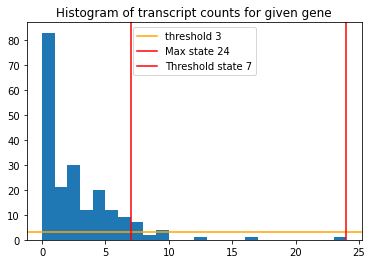

N = 7 feasible:


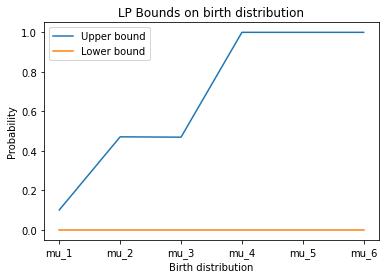

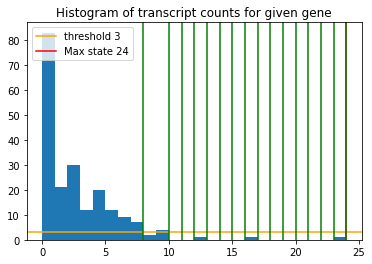

N = 24 feasible:


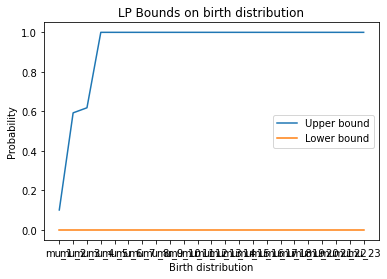

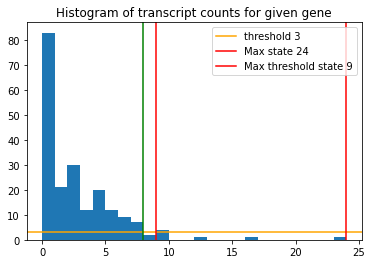

N = 9 feasible:


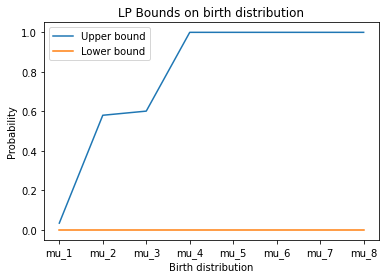

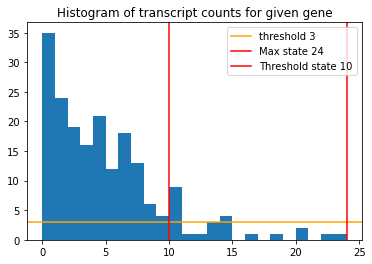

N = 10 feasible:


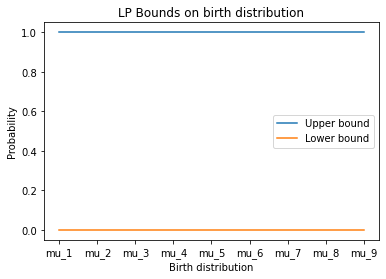

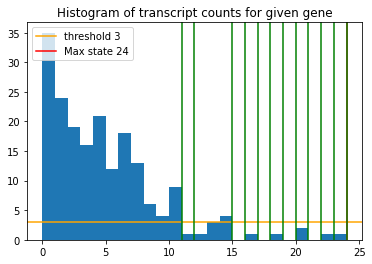

N = 24 feasible:


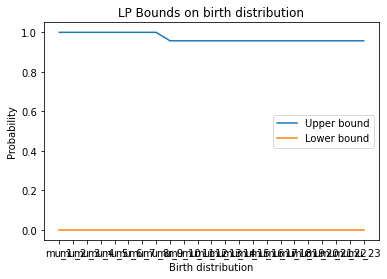

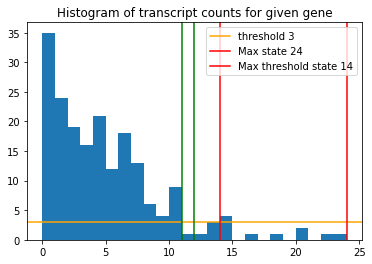

N = 14 feasible:


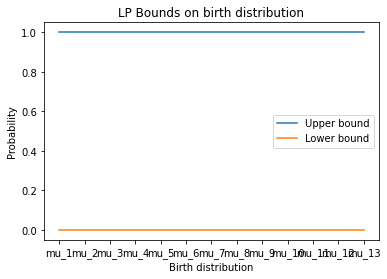

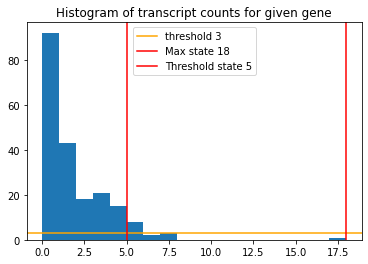

N = 5 feasible:


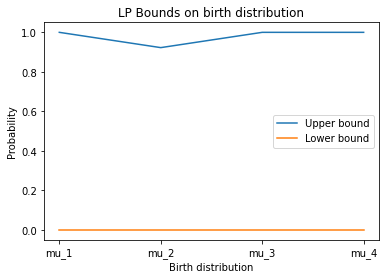

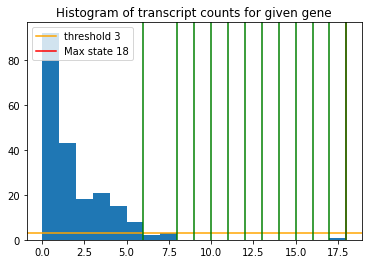

N = 18 feasible:


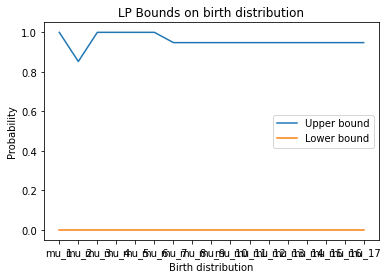

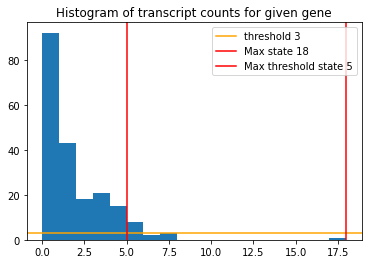

N = 5 feasible:


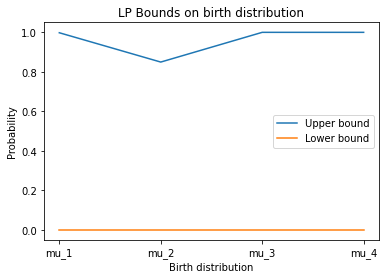

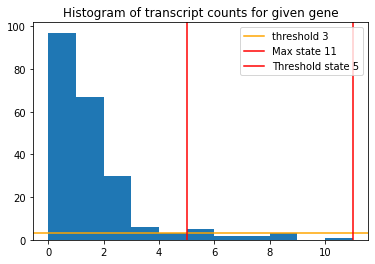

N = 5 feasible:


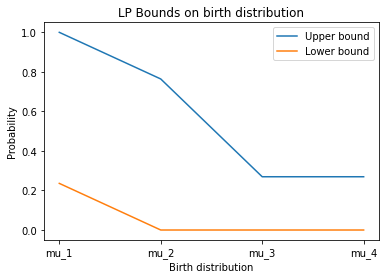

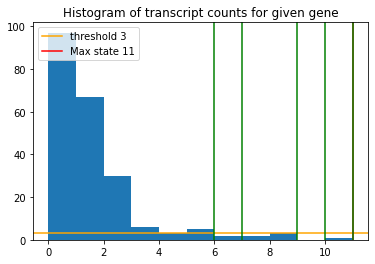

N = 11 feasible:


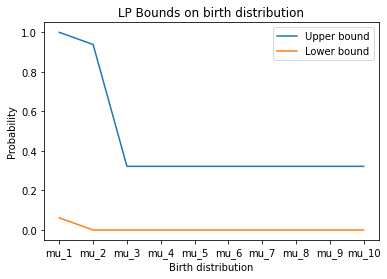

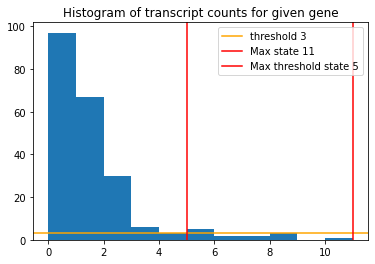

N = 5 feasible:


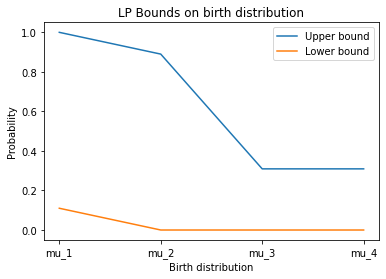

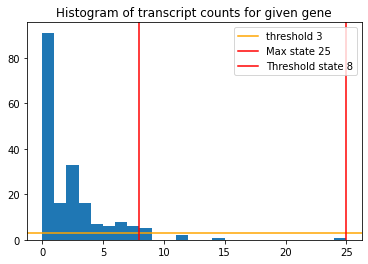

N = 8 infeasible
N = 7 infeasible
N = 6 infeasible
N = 5 infeasible
N = 4 infeasible
N = 3 feasible:


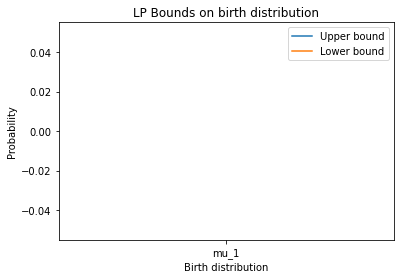

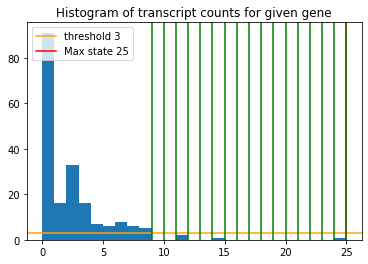

N = 25 infeasible
N = 24 infeasible
N = 23 infeasible
N = 22 infeasible
N = 21 infeasible
N = 20 infeasible
N = 19 infeasible
N = 18 infeasible
N = 17 infeasible
N = 16 infeasible
N = 15 infeasible
N = 14 infeasible
N = 13 infeasible
N = 12 infeasible
N = 11 infeasible
N = 10 infeasible
N = 9 infeasible
N = 8 infeasible
N = 7 infeasible
N = 6 infeasible
N = 5 infeasible
N = 4 infeasible
N = 3 feasible:


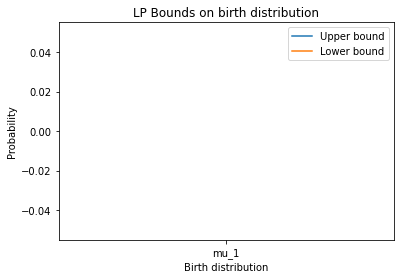

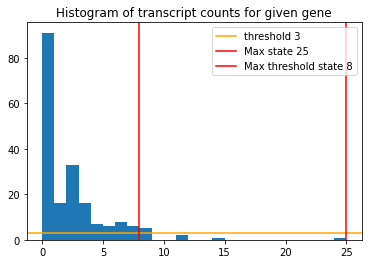

N = 8 infeasible
N = 7 infeasible
N = 6 infeasible
N = 5 infeasible
N = 4 infeasible
N = 3 feasible:


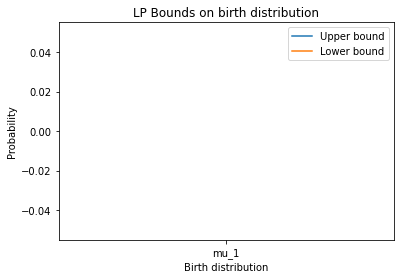

Edge case


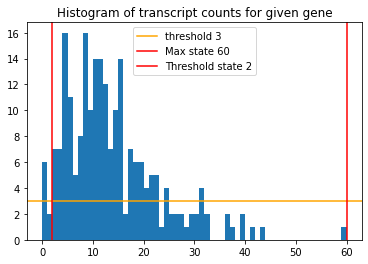

N = 2 feasible:


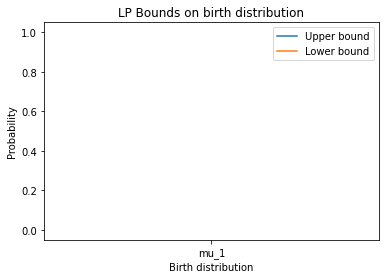

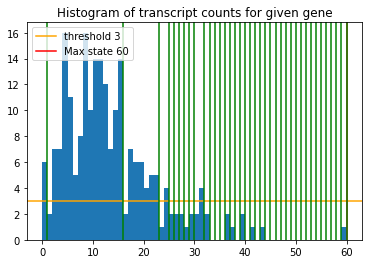

N = 60 feasible:


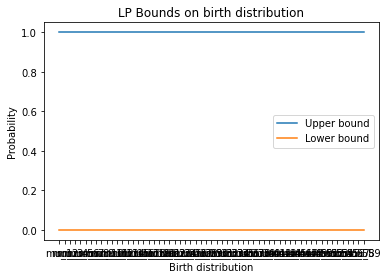

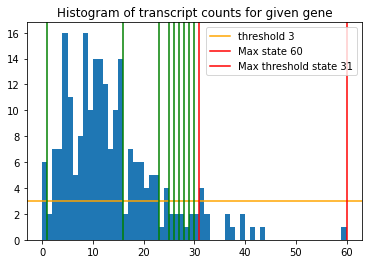

N = 31 feasible:


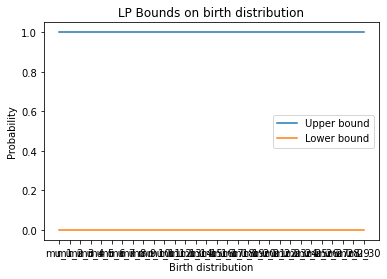

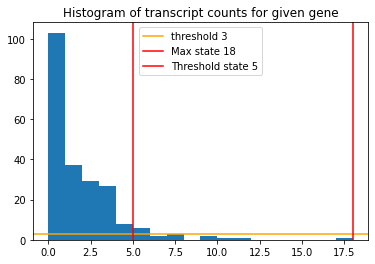

N = 5 feasible:


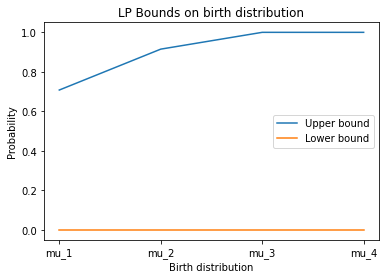

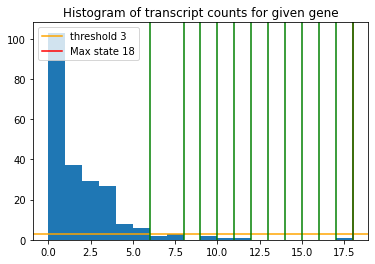

N = 18 feasible:


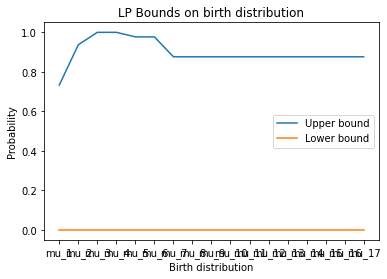

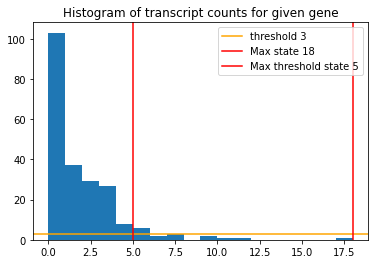

N = 5 feasible:


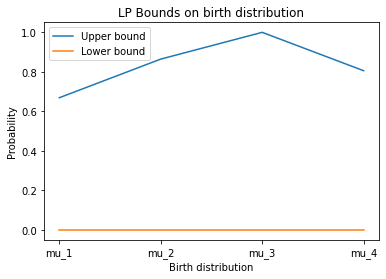

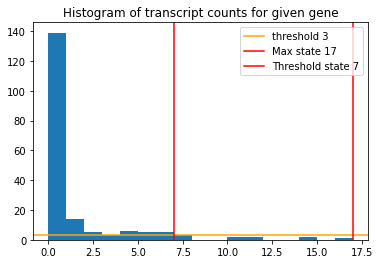

N = 7 feasible:


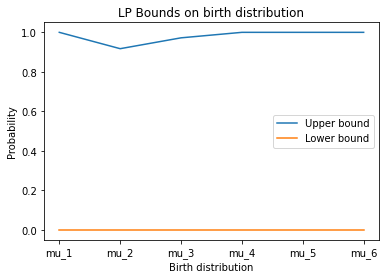

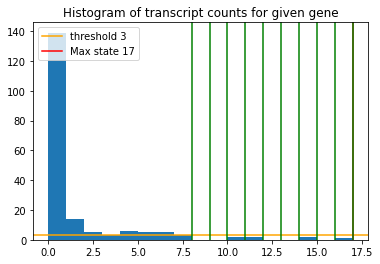

N = 17 feasible:


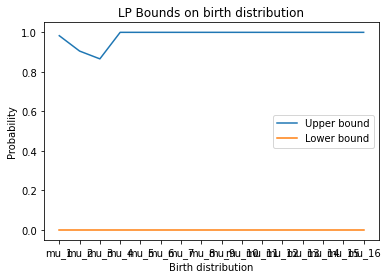

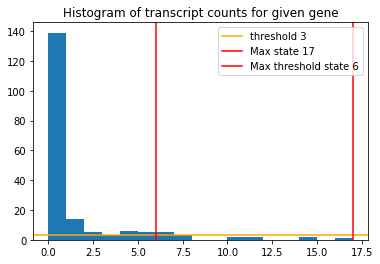

N = 6 feasible:


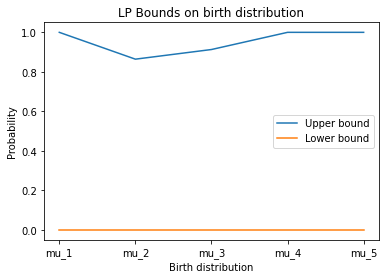

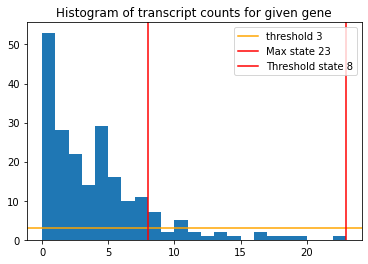

N = 8 feasible:


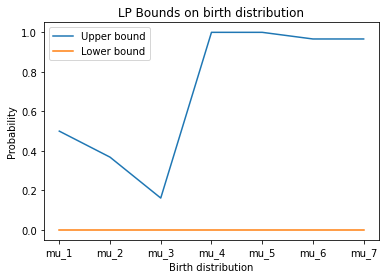

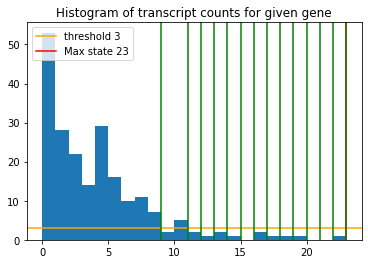

N = 23 feasible:


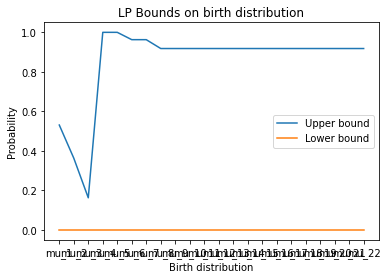

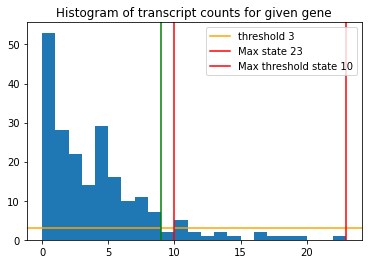

N = 10 feasible:


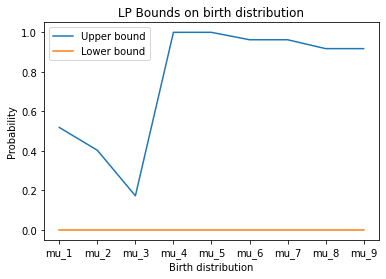

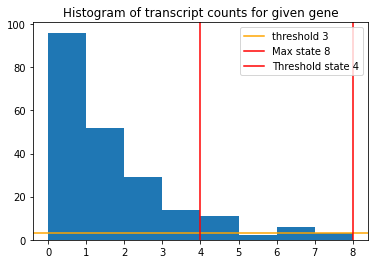

N = 4 feasible:


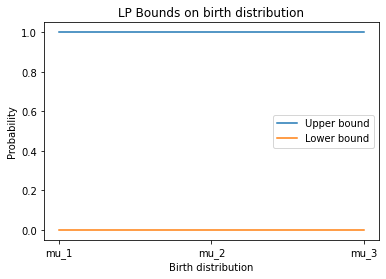

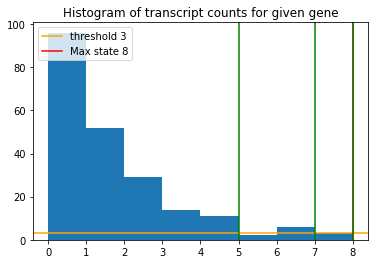

N = 8 feasible:


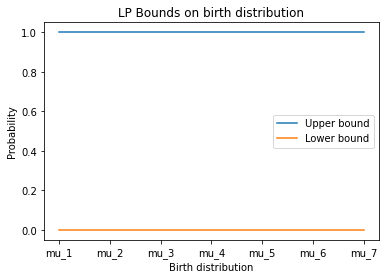

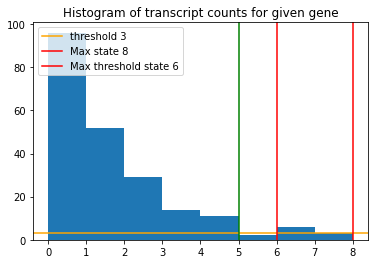

N = 6 feasible:


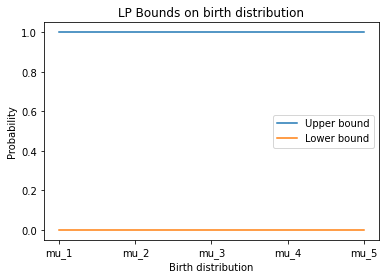

In [21]:
rng = np.random.default_rng(352)
for i in rng.choice(data_cleaned.shape[0], size = 10):
    sample = data_cleaned.iloc[i]
    solution_threshold = bound_sample_threshold(sample, threshold=3)
    solution_threshold_uni = bound_sample_threshold_uninformed(sample, threshold=3)
    solution_refined = bound_sample_refined(sample, threshold=3)

Very good performance, best of both worlds between fast and accurate bounds of pure thresholding, while also using some [0,1] bounds to utilise more of the data and estimate more bounds.

# Bug fix

If in edge case, or otherwiese, with the intial N, M chosen to be = 2, 1 and this LP is infeasible, the code would then reduce N and M by skip (= 1 by default) and attempt to solve this new LP, BEFORE checking for N >= 2 / M >= 1, giving a ValueError as M has dimension 0 (or negative).

Fix by checking infeasible LP has N >= 3 before dropping equation and solving reduced LP. 


In [32]:
def bound_sample_refined(sample, threshold=5, skip=1, n=1000, N=None, 
                         plot_sample=True, print_bounds=False, 
                         print_status=True, plot_solution=True):
    """
    Given transcript samples from gene, bootstrap and solve LP to bound parameters

    sample: list of up to ~200 counts of transcripts of gene in cells
    threshold: minimum number of occurances in sample needed to include state x
            set to zero to use up to max state available
    skip: number of equations to drop after an infeasible result
    n: number of bootstrap samples
    N: option to manually specify number of equations used
    settings:
    plot_sample: toggle histogram of sample
    print_bounds: toggle printing CI bounds
    print_status: toggle printing feasible/infeasible reports
    plot_solution: toggle plotting solution bounds on distribution
    """

    # find max burst size in sample
    x_max = int(np.nanmax(sample))

    # compute all possible bounds: p(0), ... , p(x_max)
    intervals = bootstrap_data([x for x in range(x_max + 1)], sample, n, printing=print_bounds)

    # dict of states and occurances in sample
    counts = sample.value_counts().to_dict()

    # find max state with more than threshold occurances
    x_max_thresh = x_max
    # look at all states: decreasing from max
    for x in range(x_max, -1, -1):
        if x in counts:
            # check for first state with > threshold occurance
            if counts[x] > threshold:
                # record state
                x_max_thresh = x
                break

    # edge case: need at least bounds up to p(2) to estimate pi_1
    if x_max_thresh < 2:
        print("Edge case")
        x_max_thresh = 2

    # for each state up to x_max_thesh:
    # above threshold # observations => use CI
    # below => use [0,1] bounds
    # track [0,1] bounded states
    non_bounds = []
    for x in range(x_max_thresh + 1):
        if x in counts:
            # below
            if counts[x] < threshold:
                # [0,1] bounds
                intervals[x] = np.array([0.0, 1.0])
                non_bounds.append(x)
        # if not in count: 0 occurances, below threshold (unless = 0)
        elif threshold > 0:
            intervals[x] = np.array([0.0, 1.0])
            non_bounds.append(x)
     
    # plot sample hist and threshold
    if plot_sample:
        plt.hist(sample, bins=x_max);
        plt.title("Histogram of transcript counts for given gene")
        plt.axhline(threshold, 0, 1, color="orange", label=f"threshold {threshold}")
        plt.axvline(x_max, color="red", label=f"Max state {x_max}")
        plt.axvline(x_max_thresh, color="red", label=f"Max threshold state {x_max_thresh}")
        for x in non_bounds:
            plt.axvline(x, color="green")
        plt.legend()
        plt.show()

    # get bounds on p(0), ..., p(x_max_thresh)
    # can use UP TO equation N = x_max, as involves up to p(x_max_thresh)
    # equation N involves pi's up to pi_(N-1), so M = N - 1
    if not N:
        N = x_max_thresh
        M = N - 1
    
    # solve LP using data
    solutions_dist = bursty_LP(N, intervals, k0=1)

    """
    # check if infeasible
    while solutions_dist['mu_1'][2] == 'infeasible':
        if print_status: print(f"N = {N} infeasible")
        # try again with smaller N (drop 'skip' # of equations)
        N -= skip
        M -= skip
        solutions_dist = bursty_LP(N, intervals, k0=1)
        # stop if too few equations
        if N <= skip + 2:
            break
    """

    # check if infeasible
    while solutions_dist['mu_1'][2] == 'infeasible':
        if print_status: print(f"N = {N} infeasible")
        # stop if too few equations (cannot reduce any further leads to M = 0)
        if N <= skip + 1:
            break
        # try again with smaller N (drop 'skip' # of equations)
        N -= skip
        M -= skip
        solutions_dist = bursty_LP(N, intervals, k0=1)

    if print_status: print(f"N = {N} feasible:")

    # plot
    if plot_solution:
        # extract distribution bounds
        labels = [f'mu_{m}' for m in range(1, M + 1)]
        lower = [solutions_dist[var][0] for var in labels]
        upper = [solutions_dist[var][1] for var in labels]
        plt.plot(labels, upper, label = "Upper bound")
        plt.plot(labels, lower, label = "Lower bound")
        plt.title("LP Bounds on birth distribution")
        plt.ylabel("Probability")
        plt.xlabel("Birth distribution")
        plt.legend()
        plt.show()

    # return bounds
    return solutions_dist

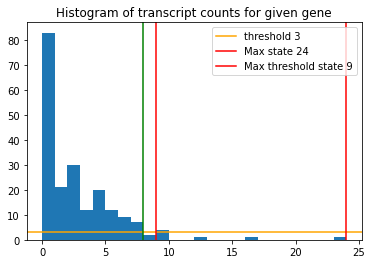

N = 9 feasible:


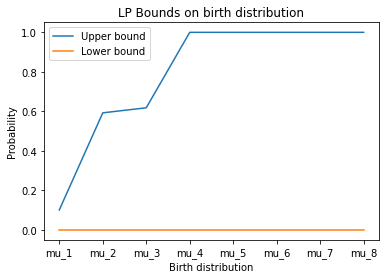

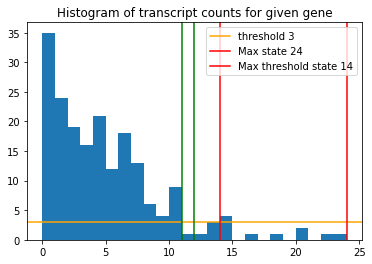

N = 14 feasible:


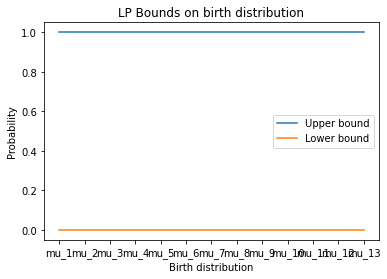

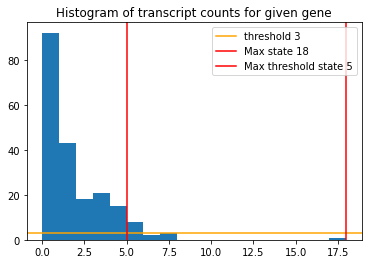

N = 5 feasible:


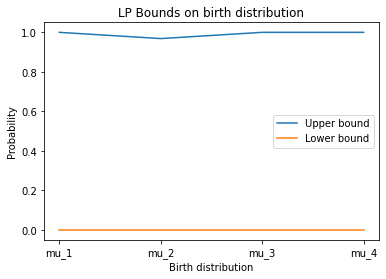

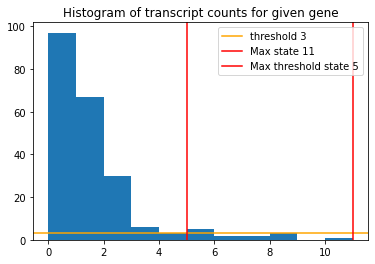

N = 5 feasible:


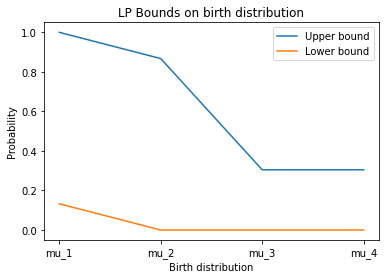

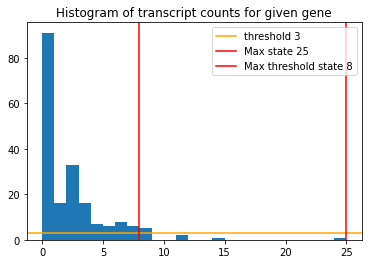

N = 8 infeasible
N = 7 infeasible
N = 6 infeasible
N = 5 infeasible
N = 4 infeasible
N = 3 infeasible
N = 2 infeasible
N = 2 feasible:


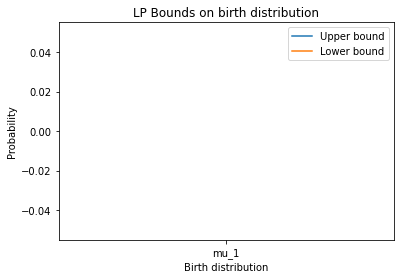

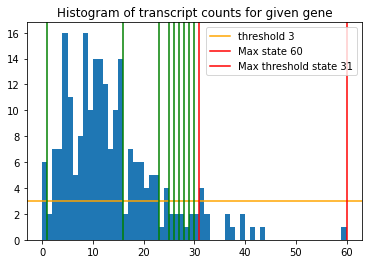

N = 31 feasible:


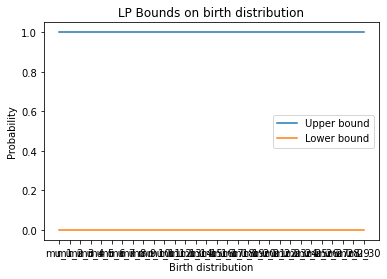

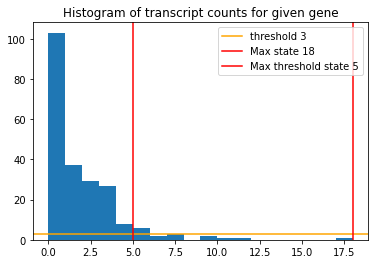

N = 5 feasible:


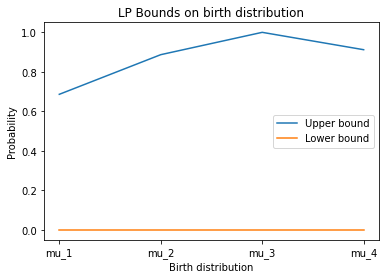

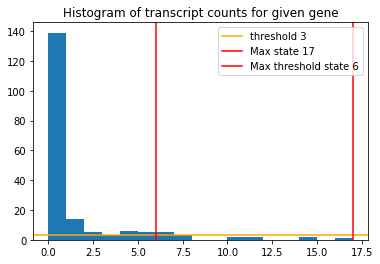

N = 6 feasible:


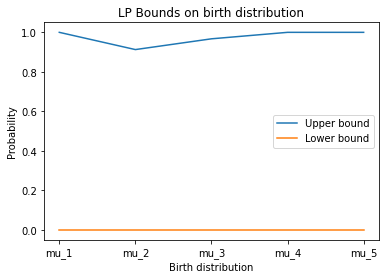

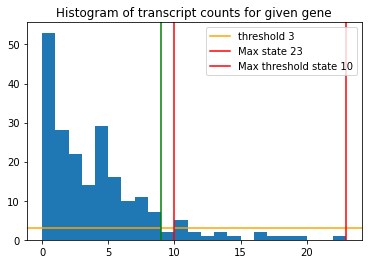

N = 10 feasible:


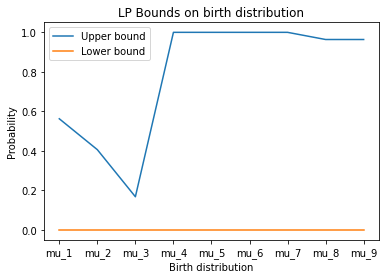

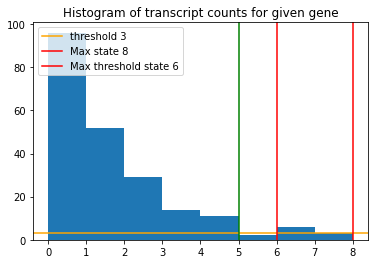

N = 6 feasible:


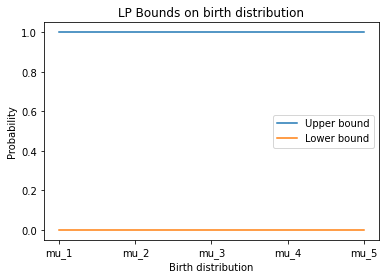

In [14]:
rng = np.random.default_rng(352)
for i in rng.choice(data_cleaned.shape[0], size = 10):
    sample = data_cleaned.iloc[i]
    solution_refined = bound_sample_refined(sample, threshold=3)

# MAP data

As discussed in 'BayNorm_exploration.Rmd', we use the bayNorm package on the datset of observed transcript counts to estimate a posterior distribution of true counts for each $x_{i,j}$ (gene i in cell j). Taking the mode of the posterior for each $x_{i,j}$ (MAP) gives the dataset of MAP counts of same size as original data. 

We investigated how this changes the distribution of count values (upscaling them and spreading over a larger range) and now investigate the impact of the solution bounds. First we need to test the LP/state space truncation methods to see how best to analyze MAP counts:
### Load data:

In [33]:
data_MAP = pd.read_csv("..\Data\SS3_c57_UMIs_concat_MAP.csv", index_col="Unnamed: 0")
data_MAP.head()

,SS3_MAF_Leo171129_p2_S10,SS3_MAF_Leo171129_p2_S12,SS3_MAF_Leo171129_p2_S13,SS3_MAF_Leo171129_p2_S14,SS3_MAF_Leo171129_p2_S16,SS3_MAF_Leo171129_p2_S17,SS3_MAF_Leo171129_p2_S18,SS3_MAF_Leo171129_p2_S19,SS3_MAF_Leo171129_p2_S1,SS3_MAF_Leo171129_p2_S20,...,SS3_MAF_leo180223_p4_S182,SS3_MAF_leo180223_p4_S186,SS3_MAF_leo180223_p4_S187,SS3_MAF_leo180223_p4_S191,SS3_MAF_leo180223_p4_S185,SS3_MAF_leo180223_p4_S189,SS3_MAF_leo180223_p4_S188,SS3_MAF_leo180223_p4_S190,SS3_MAF_leo180223_p4_S98,SS3_MAF_leo180223_p4_S99
0610007P14Rik,1,22,23,24,13,21,29,35,76,16,...,11,28,2,26,21,76,40,1,2,2
0610009B22Rik,133,49,10,10,11,75,186,58,20,22,...,69,52,60,43,144,7,18,59,59,48
0610031J06Rik,272,230,139,205,34,60,62,224,41,105,...,228,111,144,133,113,294,184,48,64,91
1110007C09Rik,12,0,48,114,0,0,0,0,0,0,...,44,18,0,184,0,0,53,0,34,0
1110037F02Rik,6,5,44,5,27,51,3,19,80,4,...,23,37,10,28,40,26,57,6,7,50


# Truncation schemes

## (1) Max state

Compute CI's for all states up to maximum count observed $x_{max}$, use all bounds for stationary distribution, solving LP and dropping equations if they are infeasible

In [34]:
def bound_sample(sample, skip=1, n=1000, N=None, printing=False, plotting=False):
    """
    Given transcript samples from gene, bootstrap and solve LP to bound parameters

    sample: list of up to ~200 counts of transcripts of gene in cells
    skip: number of equations to drop after an infeasible result
    n: number of bootstrap samples
    printing: toggle to print CI's
    plotting: toggle to plot dist bounds
    """
    # find max burst size in sample
    x_max = int(np.nanmax(sample))
    intervals = bootstrap_data([x for x in range(x_max + 1)], sample, n)

    # plot sample hist and threshold
    if plotting:
        plt.hist(sample, bins=50);
        plt.title("Histogram of transcript counts for given gene")
        plt.axvline(x_max, color="red", label=f"Max state {x_max}")
        plt.legend()
        plt.show()
        print("plotted")

    # get bounds on p(0), ..., p(x_max)
    # can use UP TO equation N = x_max, as involves up to p(x_max)
    # allow manual N selection (needs to be <= x_max)
    # equation N involves pi's up to pi_(N-1), so M = N - 1
    if not N:
        N = x_max
    M = N - 1
    
    
    # solve LP using data
    solutions_dist = bursty_LP(N, intervals, k0=1)

    # check if infeasible
    while solutions_dist['mu_1'][2] == 'infeasible':
        if printing: print(f"N = {N} infeasible")
        # try again with smaller N (drop 1 equation)
        N -= skip
        M -= skip
        solutions_dist = bursty_LP(N, intervals, k0=1)
        # stop if too few equations
        if N <= skip + 2:
            break

    if printing: print(f"N = {N} feasible:")

    # plot
    if plotting:
        # extract distribution bounds
        labels = [f'mu_{m}' for m in range(1, M + 1)]
        lower = [solutions_dist[var][0] for var in labels]
        upper = [solutions_dist[var][1] for var in labels]
        plt.plot(labels, upper, label = "Upper bound")
        plt.plot(labels, lower, label = "Lower bound")
        plt.title("LP Bounds on birth distribution")
        plt.ylabel("Probability")
        plt.xlabel("Birth distribution")
        plt.legend()
        plt.show()

    # return bounds
    return solutions_dist

#### Example

For a given gene try to solve using all data, dropping infeasible equations. See that we need to drop a huge number of equations until we obtain a feasible LP giving solutions: a very inefficient method, even worse than when used on the observed count data due to even longer tails.

Note: start from N = 50 to save the time of solving N = 150, ..., 51 (clearly infeasible as more constrained), but end up having to drop to N = 13 equations until feasible.

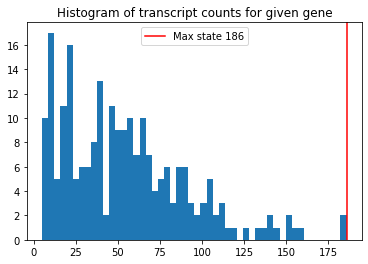

plotted
N = 50 infeasible
N = 49 infeasible
N = 48 infeasible
N = 47 infeasible
N = 46 infeasible
N = 45 infeasible
N = 44 infeasible
N = 43 infeasible
N = 42 infeasible
N = 41 infeasible
N = 40 infeasible
N = 39 infeasible
N = 38 infeasible
N = 37 infeasible
N = 36 infeasible
N = 35 infeasible
N = 34 infeasible
N = 33 infeasible
N = 32 infeasible
N = 31 infeasible
N = 30 infeasible
N = 29 infeasible
N = 28 infeasible
N = 27 infeasible
N = 26 infeasible
N = 25 infeasible
N = 24 infeasible
N = 23 infeasible
N = 22 infeasible
N = 21 infeasible
N = 20 infeasible
N = 19 infeasible
N = 18 infeasible
N = 17 infeasible
N = 16 infeasible
N = 15 infeasible
N = 14 infeasible
N = 13 feasible:


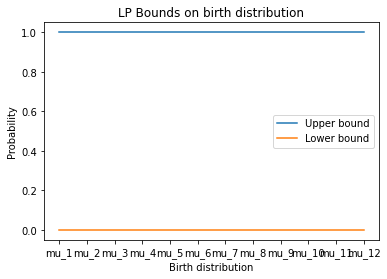

In [24]:
sample = data_MAP.iloc[1]
solution = bound_sample(sample, skip=1, n=1000, N=50, printing=True, plotting=True)

## (2) Thresholding

Use states 0, ... , $x_{\tau}$ s.t. $x_{\tau+1}$ is the first state with < a threshold number of observations/occurances in the sample.

In [35]:
def bound_sample_threshold(sample, threshold=5, skip=1, n=1000, N=None, 
                           plot_sample=True, print_bounds=False, 
                           print_status=True, plot_solution=True):
    """
    Given transcript samples from gene, bootstrap and solve LP to bound parameters

    sample: list of up to ~200 counts of transcripts of gene in cells
    threshold: minimum number of occurances in sample needed to include state x
            set to zero to use up to max state available
    skip: number of equations to drop after an infeasible result
    n: number of bootstrap samples
    N: option to manually specify number of equations used
    settings:
    plot_sample: toggle histogram of sample
    print_bounds: toggle printing CI bounds
    print_status: toggle printing feasible/infeasible reports
    plot_solution: toggle plotting solution bounds on distribution
    """

    # find max burst size in sample
    x_max = int(np.nanmax(sample))

    # dict of states and occurances in sample
    counts = sample.value_counts().to_dict()
    x_max_thresh = x_max
    # look at all states up to max
    for x in range(x_max + 1):
        if x in counts:
            # check for first state with < threshold occurance
            if counts[x] < threshold:
                # get previous state
                x_max_thresh = x - 1
                break
        # if not in count: 0 occurances, below threshold (unless = 0)
        elif threshold > 0:
            x_max_thresh = x - 1
            break

    # edge case: need at least bounds up to p(2) to estimate pi_1
    if x_max_thresh < 2:
        print("Edge case")
        x_max_thresh = 2
     
    # plot sample hist and threshold
    if plot_sample:
        plt.hist(sample, bins=x_max);
        plt.title("Histogram of transcript counts for given gene")
        plt.axhline(threshold, 0, 1, color="orange", label=f"threshold {threshold}")
        plt.axvline(x_max, color="red", label=f"Max state {x_max}")
        plt.axvline(x_max_thresh, color="red", label=f"Threshold state {x_max_thresh}")
        plt.legend()
        plt.show()
    
    # compute p(0), ... , p(x_max_thresh) bounds
    intervals = bootstrap_data([x for x in range(x_max_thresh + 1)], sample, n, printing=print_bounds)

    # get bounds on p(0), ..., p(x_max_thresh)
    # can use UP TO equation N = x_max_thresh, as involves up to p(x_max_thresh)
    # equation N involves pi's up to pi_(N-1), so M = N - 1
    if not N:
        N = x_max_thresh
        M = N - 1
    
    # solve LP using data
    solutions_dist = bursty_LP(N, intervals, k0=1)

    # check if infeasible
    while solutions_dist['mu_1'][2] == 'infeasible':
        if print_status: print(f"N = {N} infeasible")
        # stop if too few equations (cannot reduce any further leads to M = 0)
        if N <= skip + 1:
            break
        # try again with smaller N (drop 'skip' # of equations)
        N -= skip
        M -= skip
        solutions_dist = bursty_LP(N, intervals, k0=1)

    if print_status: print(f"N = {N} feasible:")

    # plot
    if plot_solution:
        # extract distribution bounds
        labels = [f'mu_{m}' for m in range(1, M + 1)]
        lower = [solutions_dist[var][0] for var in labels]
        upper = [solutions_dist[var][1] for var in labels]
        plt.plot(labels, upper, label = "Upper bound")
        plt.plot(labels, lower, label = "Lower bound")
        plt.title("LP Bounds on birth distribution")
        plt.ylabel("Probability")
        plt.xlabel("Birth distribution")
        plt.legend()
        plt.show()

    # return bounds
    return solutions_dist

### Breaks down when initial states have low observations

Breaks down if intital states: 0, 1, 2 etc have < threshold occurances in the sample, as then no $\tau$ can be found. This is an even bigger problem with the MAP data as the upscaling / imputation of dropouts (zero counts) means the distribution of counts no longer peaks around 0, 1 (in general).

Edge case


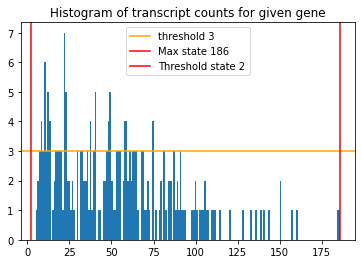

N = 2 feasible:


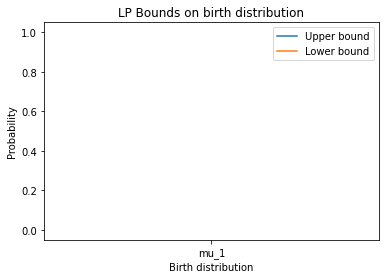

In [31]:
sample = data_MAP.iloc[1]
solution = bound_sample_threshold(sample, threshold=3, skip=1, n=1000, N=None, 
                                  plot_sample=True, print_bounds=False,
                                  print_status=True, plot_solution=True)

### Can significantly reduce data used / $\pi$'s estimated

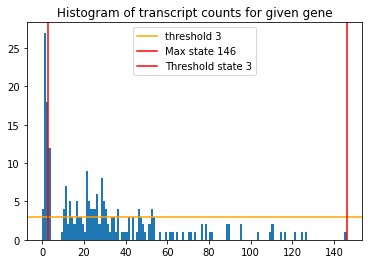

N = 3 feasible:


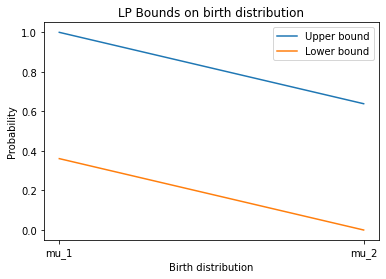

In [32]:
sample = data_MAP.iloc[0]
solution = bound_sample_threshold(sample, threshold=3, skip=1, n=1000, N=None, 
                                  plot_sample=True, print_bounds=False,
                                  print_status=True, plot_solution=True)

## (3) Thresholding + Un-informed bounds

Compute CI's for all states up to maximum observed $x_{max}$, set a threshold on the minimum number of observations needed to "trust" a CI: states with < threshold observations in the sample have stationary bounds set to [0,1]

In [36]:
def bound_sample_threshold_uninformed(sample, threshold=5, skip=1, n=1000, N=None, 
                           plot_sample=True, print_bounds=False, 
                           print_status=True, plot_solution=True):
    """
    Given transcript samples from gene, bootstrap and solve LP to bound parameters

    sample: list of up to ~200 counts of transcripts of gene in cells
    threshold: minimum number of occurances in sample needed to include state x
            set to zero to use up to max state available
    skip: number of equations to drop after an infeasible result
    n: number of bootstrap samples
    N: option to manually specify number of equations used
    settings:
    plot_sample: toggle histogram of sample
    print_bounds: toggle printing CI bounds
    print_status: toggle printing feasible/infeasible reports
    plot_solution: toggle plotting solution bounds on distribution
    """

    # find max burst size in sample
    x_max = int(np.nanmax(sample))

    # compute all possible bounds: p(0), ... , p(x_max)
    intervals = bootstrap_data([x for x in range(x_max + 1)], sample, n, printing=print_bounds)

    # dict of states and occurances in sample
    counts = sample.value_counts().to_dict()

    # for each state up to x_max:
    # above threshold # observations => use CI
    # below => use [0,1] bounds
    # track [0,1] bounded states
    non_bounds = []
    for x in range(x_max + 1):
        if x in counts:
            # below
            if counts[x] < threshold:
                # [0,1] bounds
                intervals[x] = np.array([0.0, 1.0])
                non_bounds.append(x)
        # if not in count: 0 occurances, below threshold (unless = 0)
        elif threshold > 0:
            intervals[x] = np.array([0.0, 1.0])
            non_bounds.append(x)
     
    # plot sample hist and threshold
    if plot_sample:
        plt.hist(sample, bins=x_max);
        plt.title("Histogram of transcript counts for given gene")
        plt.axhline(threshold, 0, 1, color="orange", label=f"threshold {threshold}")
        plt.axvline(x_max, color="red", label=f"Max state {x_max}")
        for x in non_bounds:
            plt.axvline(x, color="green")
        plt.legend()
        plt.show()

    # get bounds on p(0), ..., p(x_max)
    # can use UP TO equation N = x_max, as involves up to p(x_max)
    # equation N involves pi's up to pi_(N-1), so M = N - 1
    if not N:
        N = x_max
        M = N - 1
    
    # solve LP using data
    solutions_dist = bursty_LP(N, intervals, k0=1)

    # check if infeasible
    while solutions_dist['mu_1'][2] == 'infeasible':
        if print_status: print(f"N = {N} infeasible")
        # try again with smaller N (drop 'skip' # of equations)
        N -= skip
        M -= skip
        solutions_dist = bursty_LP(N, intervals, k0=1)
        # stop if too few equations
        if N <= skip + 2:
            break

    if print_status: print(f"N = {N} feasible:")

    # plot
    if plot_solution:
        # extract distribution bounds
        labels = [f'mu_{m}' for m in range(1, M + 1)]
        lower = [solutions_dist[var][0] for var in labels]
        upper = [solutions_dist[var][1] for var in labels]
        plt.plot(labels, upper, label = "Upper bound")
        plt.plot(labels, lower, label = "Lower bound")
        plt.title("LP Bounds on birth distribution")
        plt.ylabel("Probability")
        plt.xlabel("Birth distribution")
        plt.legend()
        plt.show()

    # return bounds
    return solutions_dist

#### Long tail

Long tails with low observations do not provide any additional information, and increase computation time significantly.

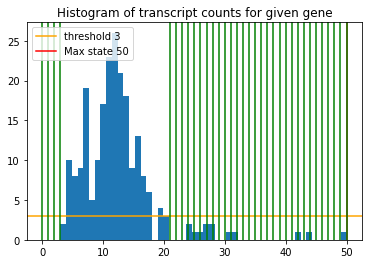

N = 50 feasible:


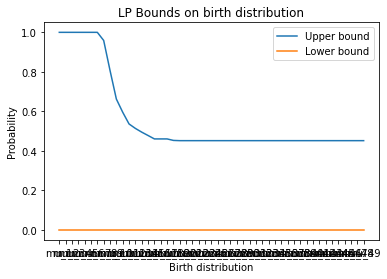

In [44]:
sample = data_MAP.iloc[1483]
solution = bound_sample_threshold_uninformed(sample, threshold=3, skip=1, n=1000, N=None, 
                                             plot_sample=True, print_bounds=False, 
                                             print_status=True, plot_solution=True)

## (4) Refined method

Set a threshold on the minimum number of observations of a state: find the largest state with $\ge$ threshold number of observations and set this as the maximum state to consider, for all smaller states use either CI, or if < threshold observations use [0,1] bounds.

NOTE: changed from above to be largest state with $\ge$ threshold observations, rather than >

In [37]:
def bound_sample_refined(sample, threshold=5, skip=1, n=1000, N=None, 
                         plot_sample=True, print_bounds=False, 
                         print_status=True, plot_solution=True):
    """
    Given transcript samples from gene, bootstrap and solve LP to bound parameters

    sample: list of up to ~200 counts of transcripts of gene in cells
    threshold: minimum number of occurances in sample needed to include state x
            set to zero to use up to max state available
    skip: number of equations to drop after an infeasible result
    n: number of bootstrap samples
    N: option to manually specify number of equations used
    settings:
    plot_sample: toggle histogram of sample
    print_bounds: toggle printing CI bounds
    print_status: toggle printing feasible/infeasible reports
    plot_solution: toggle plotting solution bounds on distribution
    """

    # find max burst size in sample
    x_max = int(np.nanmax(sample))

    # compute all possible bounds: p(0), ... , p(x_max)
    intervals = bootstrap_data([x for x in range(x_max + 1)], sample, n, printing=print_bounds)

    # dict of states and occurances in sample
    counts = sample.value_counts().to_dict()

    # find max state with more than threshold occurances
    x_max_thresh = x_max
    # look at all states: decreasing from max
    for x in range(x_max, -1, -1):
        if x in counts:
            # check for first state with >= threshold occurances
            if counts[x] >= threshold:
                # record state
                x_max_thresh = x
                break

    # edge case: need at least bounds up to p(2) to estimate pi_1
    if x_max_thresh < 2:
        print("Edge case")
        x_max_thresh = 2

    # for each state up to x_max_thesh:
    # above threshold # observations => use CI
    # below => use [0,1] bounds
    # track [0,1] bounded states
    non_bounds = []
    for x in range(x_max_thresh + 1):
        if x in counts:
            # below
            if counts[x] < threshold:
                # [0,1] bounds
                intervals[x] = np.array([0.0, 1.0])
                non_bounds.append(x)
        # if not in count: 0 occurances, below threshold (unless = 0)
        elif threshold > 0:
            intervals[x] = np.array([0.0, 1.0])
            non_bounds.append(x)
     
    # plot sample hist and threshold
    if plot_sample:
        plt.hist(sample, bins=x_max);
        plt.title("Histogram of transcript counts for given gene")
        plt.axhline(threshold, 0, 1, color="orange", label=f"threshold {threshold}")
        plt.axvline(x_max, color="red", label=f"Max state {x_max}")
        plt.axvline(x_max_thresh, color="red", label=f"Max threshold state {x_max_thresh}")
        for x in non_bounds:
            plt.axvline(x, color="green")
        plt.legend()
        plt.show()

    # get bounds on p(0), ..., p(x_max_thresh)
    # can use UP TO equation N = x_max, as involves up to p(x_max_thresh)
    # equation N involves pi's up to pi_(N-1), so M = N - 1
    if not N:
        N = x_max_thresh
    M = N - 1
    
    # solve LP using data
    solutions_dist = bursty_LP(N, intervals, k0=1)

    # check if infeasible
    while solutions_dist['mu_1'][2] == 'infeasible':
        if print_status: print(f"N = {N} infeasible")
        # stop if too few equations (cannot reduce any further leads to M = 0)
        if N <= skip + 1:
            break
        # try again with smaller N (drop 'skip' # of equations)
        N -= skip
        M -= skip
        solutions_dist = bursty_LP(N, intervals, k0=1)

    if print_status: print(f"N = {N} feasible:")

    # plot
    if plot_solution:
        # extract distribution bounds
        labels = [f'mu_{m}' for m in range(1, M + 1)]
        lower = [solutions_dist[var][0] for var in labels]
        upper = [solutions_dist[var][1] for var in labels]
        plt.plot(labels, upper, label = "Upper bound")
        plt.plot(labels, lower, label = "Lower bound")
        plt.title("LP Bounds on birth distribution")
        plt.ylabel("Probability")
        plt.xlabel("Birth distribution")
        plt.legend()
        plt.show()

    # return bounds
    return solutions_dist

Significantly faster while still making use of the majority of data and estimating $\pi_{m}$'s

Compare to above: long tail of [0,1] bounds just led to flat tail of solution bounds, whereas below see that N = 20 gave enough information while dropping the computationally expensive tail.

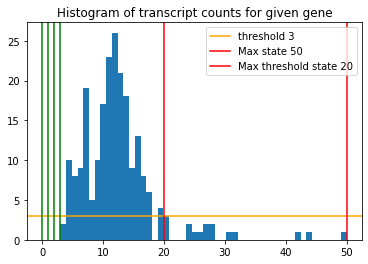

N = 20 feasible:


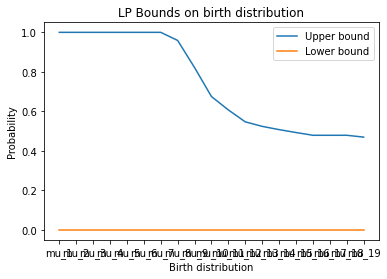

In [59]:
sample = data_MAP.iloc[1483]
solution = bound_sample_refined(sample, threshold=3, skip=1, n=1000, N=None,
                                plot_sample=True, print_bounds=False,
                                print_status=True, plot_solution=True)

Comparing to observed counts, see below that in this case we were not able to bound any $\pi_m$'s before, whereas the MAP count estimates give reasonable bounds for $\pi_1$ up to $\pi_{20}$

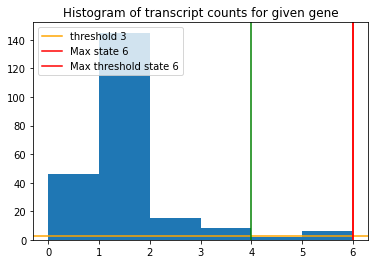

N = 6 infeasible
N = 5 infeasible
N = 4 infeasible
N = 3 infeasible
N = 2 infeasible
N = 2 feasible:


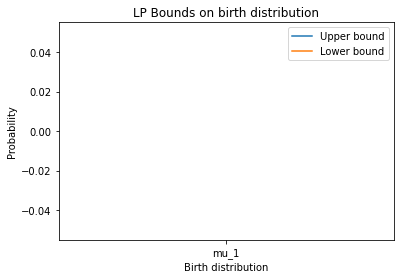

In [52]:
sample = data_cleaned.iloc[1483]
solution = bound_sample_refined(sample, threshold=3, skip=1, n=1000, N=None,
                                plot_sample=True, print_bounds=False,
                                print_status=True, plot_solution=True)

### Test random genes to see average case:

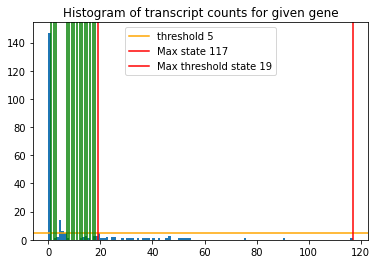

N = 19 feasible:


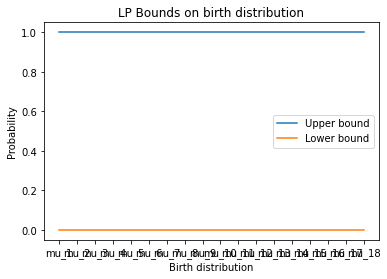

In [62]:
rng = np.random.default_rng(351)
for i in rng.choice(data_MAP.shape[0], size = 1):
    sample = data_MAP.iloc[i]
    solution_refined = bound_sample_refined(sample, threshold=5)

### Conclusion

In general see that the MAP counts are spread over a much larger range of states than observed counts, but the same number of samples leads to many count values with low or 0 samples. This is tricky to work with because we either risk using unreliable CI's for these states that reduce accuracy, or use un-informative [0, 1] bounds that reduce precision. The larger range of states also means much larger LP systems (more constraints and variables) which are more computtionally expensive to solve.

However, the observed data can suffer heavily from low capture efficiencies and using bayNorm to upscale data gives good estimates of the true counts that actually occur. We saw above that in some cases we were not able to bound any $\pi_{m}$'s given the observed data, but obtained good bounds using MAP data. In the reverse situation: where we can estimate bounds from observed data but not MAP data, we may need to use other methods, however it may simply be the case that the true counts for these genes do not fit with the model.

### Issues

The bounding + LP methods used to estimate parameter bounds ideally want a stationary distribution with tight bounds for many states, especially neighbouring states of smaller values due to the structure of Q. We have seen that long tails with loose bounds (even [0,1]) adds little to no information (as including these equations does not contrain parameters any more than before), and that methods can cope with loose / [0,1] bounds for small values states given tighter bounds on others (see example below).

However, when the histogram of stationary distribution samples (count data) is 'sparse': samples spread out with low observation numbers for most states (see example above) the estimated bounds become very loose (unreliable CI's or un-informative [0,1]) leading to poor solution bounds or infeasible results.

This 'sparse' situation is unfortunately very common for the MAP data, since the same ~200 samples are now spread over ~ 10 x the number of possible counts when upscaled, and so most samples give poor results.

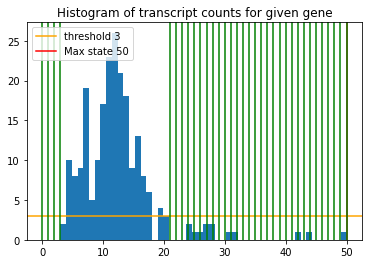

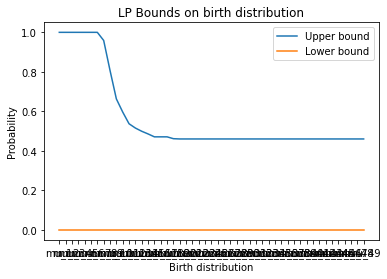

In [63]:
sample = data_MAP.iloc[1483]
solution = bound_sample_threshold_uninformed(sample, threshold=3, skip=1, n=1000, N=None, 
                                             plot_sample=True, print_bounds=False, 
                                             print_status=False, plot_solution=True)

# Posterior Samples

As with the MAP data, we use bayNorm to estimate a posterior distribution of true counts $x_{i,j}^{0}$ for each observed count $x_{i,j}$, but instead of taking the mode we sample S = 20 (for example) counts from each posterior. For each gene i and each cell j this effectively creates S 'articifical cells', giving S x the number of counts per gene.

The increased number of samples 'fills out' the larger range of upscaled counts, giving a much 'denser' picture of the stationary distribution and hopefully better bounds for the LP methods:

## Load data

see now 4480 = 20 x 224 columns

In [38]:
data_PS = pd.read_csv("..\Data\SS3_c57_UMIs_concat_PosteriorSamples.csv", index_col="Unnamed: 0")
data_PS.head()

,SS3_MAF_Leo171129_p2_S10.1,SS3_MAF_Leo171129_p2_S12.1,SS3_MAF_Leo171129_p2_S13.1,SS3_MAF_Leo171129_p2_S14.1,SS3_MAF_Leo171129_p2_S16.1,SS3_MAF_Leo171129_p2_S17.1,SS3_MAF_Leo171129_p2_S18.1,SS3_MAF_Leo171129_p2_S19.1,SS3_MAF_Leo171129_p2_S1.1,SS3_MAF_Leo171129_p2_S20.1,...,SS3_MAF_leo180223_p4_S182.20,SS3_MAF_leo180223_p4_S186.20,SS3_MAF_leo180223_p4_S187.20,SS3_MAF_leo180223_p4_S191.20,SS3_MAF_leo180223_p4_S185.20,SS3_MAF_leo180223_p4_S189.20,SS3_MAF_leo180223_p4_S188.20,SS3_MAF_leo180223_p4_S190.20,SS3_MAF_leo180223_p4_S98.20,SS3_MAF_leo180223_p4_S99.20
0610007P14Rik,2,60,54,46,26,8,35,19,106,17,...,10,12,22,37,22,62,55,25,18,23
0610009B22Rik,121,59,30,15,42,61,230,58,39,54,...,30,41,114,57,209,4,38,48,92,53
0610031J06Rik,234,268,195,198,56,44,113,203,76,85,...,255,110,170,211,165,358,165,57,173,226
1110007C09Rik,79,11,34,106,2,1,0,7,11,4,...,44,21,44,210,1,2,99,19,36,9
1110037F02Rik,20,0,79,21,17,93,14,24,47,8,...,30,57,61,137,77,29,67,12,36,37


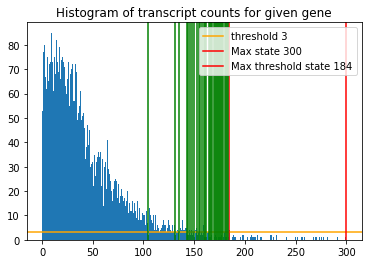

N = 50 feasible:


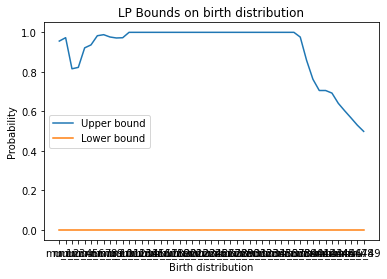

In [71]:
sample = data_PS.iloc[0]
solution = bound_sample_refined(sample, threshold=3, skip=1, n=1000, N=50,
                                plot_sample=True, print_bounds=False,
                                print_status=True, plot_solution=True)

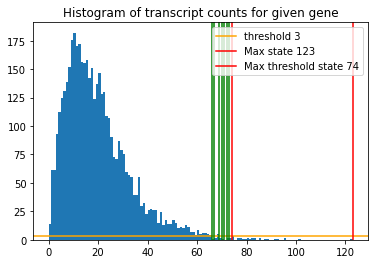

c:\Users\willi\principles_of_programming\PoP_venv\lib\site-packages\cvxpy\problems\problem.py:1387: UserWarning: Solution may be inaccurate. Try another solver, adjusting the solver settings, or solve with verbose=True for more information.
  warnings.warn(


N = 74 feasible:


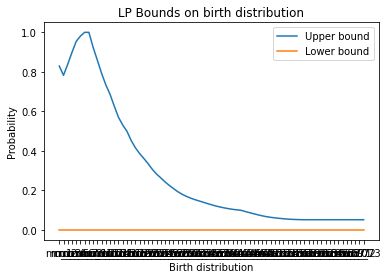

In [73]:
sample = data_PS.iloc[1483]
solution = bound_sample_refined(sample, threshold=3, skip=1, n=1000,
                                plot_sample=True, print_bounds=False,
                                print_status=True, plot_solution=True)

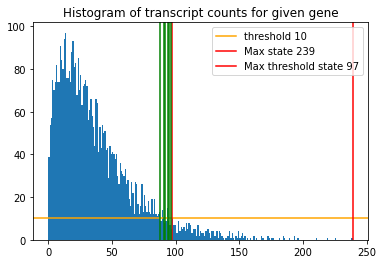

c:\Users\willi\principles_of_programming\PoP_venv\lib\site-packages\cvxpy\problems\problem.py:1387: UserWarning: Solution may be inaccurate. Try another solver, adjusting the solver settings, or solve with verbose=True for more information.
  warnings.warn(


N = 97 feasible:


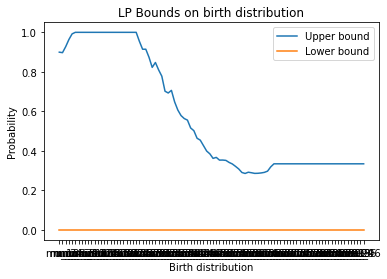

In [75]:
sample = data_PS.iloc[1484]
solution = bound_sample_refined(sample, threshold=10, skip=1, n=1000,
                                plot_sample=True, print_bounds=False,
                                print_status=True, plot_solution=True)

# Missing constraint

The stationary distribution p is, of course, a distribution and so we have $0\le p(x)\le 1$ but also $ \sum_{x} p(x) = 1 $, which when truncating to a subset of the state space T gives: $ \sum_{x \in T} p(x) \le 1 $

So far we have ensured $ p(x) \in [0,1]$ by using bootstrap confidence intervals for each p(x), which are guaranteed to be stricter than [0,1]. However, we have not explicity constrained the sum of p(x)'s, so now add and test for improvements:

### Load datasets

In [2]:
# Observed count data
data_OB = pd.read_csv("..\Data\SS3_c57_UMIs_concat_cleaned.csv", index_col="Unnamed: 0")
data_OB.head()

,SS3_MAF_Leo171129_p2_S10,SS3_MAF_Leo171129_p2_S12,SS3_MAF_Leo171129_p2_S13,SS3_MAF_Leo171129_p2_S14,SS3_MAF_Leo171129_p2_S16,SS3_MAF_Leo171129_p2_S17,SS3_MAF_Leo171129_p2_S18,SS3_MAF_Leo171129_p2_S19,SS3_MAF_Leo171129_p2_S1,SS3_MAF_Leo171129_p2_S20,...,SS3_MAF_leo180223_p4_S182,SS3_MAF_leo180223_p4_S186,SS3_MAF_leo180223_p4_S187,SS3_MAF_leo180223_p4_S191,SS3_MAF_leo180223_p4_S185,SS3_MAF_leo180223_p4_S189,SS3_MAF_leo180223_p4_S188,SS3_MAF_leo180223_p4_S190,SS3_MAF_leo180223_p4_S98,SS3_MAF_leo180223_p4_S99
0610007P14Rik,0.0,2.0,2.0,2.0,1.0,4.0,4.0,4.0,7.0,2.0,...,1.0,3.0,0.0,1.0,2.0,9.0,4.0,0.0,0.0,0.0
0610009B22Rik,10.0,4.0,NaN,NaN,0.0,14.0,26.0,6.0,1.0,2.0,...,6.0,5.0,2.0,1.0,14.0,0.0,1.0,4.0,3.0,2.0
0610031J06Rik,17.0,18.0,9.0,14.0,0.0,9.0,6.0,22.0,1.0,10.0,...,18.0,9.0,3.0,2.0,8.0,31.0,15.0,1.0,1.0,2.0
1110007C09Rik,1.0,0.0,4.0,9.0,0.0,0.0,NaN,0.0,NaN,0.0,...,4.0,2.0,NaN,6.0,0.0,0.0,5.0,0.0,2.0,0.0
1110037F02Rik,0.0,0.0,4.0,0.0,2.0,10.0,0.0,2.0,8.0,0.0,...,2.0,4.0,0.0,1.0,4.0,3.0,6.0,0.0,0.0,3.0


In [3]:
# MAP count data
data_MAP = pd.read_csv("..\Data\SS3_c57_UMIs_concat_MAP.csv", index_col="Unnamed: 0")
data_MAP.head()

,SS3_MAF_Leo171129_p2_S10,SS3_MAF_Leo171129_p2_S12,SS3_MAF_Leo171129_p2_S13,SS3_MAF_Leo171129_p2_S14,SS3_MAF_Leo171129_p2_S16,SS3_MAF_Leo171129_p2_S17,SS3_MAF_Leo171129_p2_S18,SS3_MAF_Leo171129_p2_S19,SS3_MAF_Leo171129_p2_S1,SS3_MAF_Leo171129_p2_S20,...,SS3_MAF_leo180223_p4_S182,SS3_MAF_leo180223_p4_S186,SS3_MAF_leo180223_p4_S187,SS3_MAF_leo180223_p4_S191,SS3_MAF_leo180223_p4_S185,SS3_MAF_leo180223_p4_S189,SS3_MAF_leo180223_p4_S188,SS3_MAF_leo180223_p4_S190,SS3_MAF_leo180223_p4_S98,SS3_MAF_leo180223_p4_S99
0610007P14Rik,1,22,23,24,13,21,29,35,76,16,...,11,28,2,26,21,76,40,1,2,2
0610009B22Rik,133,49,10,10,11,75,186,58,20,22,...,69,52,60,43,144,7,18,59,59,48
0610031J06Rik,272,230,139,205,34,60,62,224,41,105,...,228,111,144,133,113,294,184,48,64,91
1110007C09Rik,12,0,48,114,0,0,0,0,0,0,...,44,18,0,184,0,0,53,0,34,0
1110037F02Rik,6,5,44,5,27,51,3,19,80,4,...,23,37,10,28,40,26,57,6,7,50


In [4]:
# Posterior sample count data
data_PS = pd.read_csv("..\Data\SS3_c57_UMIs_concat_PosteriorSamples.csv", index_col="Unnamed: 0")
data_PS.head()

,SS3_MAF_Leo171129_p2_S10.1,SS3_MAF_Leo171129_p2_S12.1,SS3_MAF_Leo171129_p2_S13.1,SS3_MAF_Leo171129_p2_S14.1,SS3_MAF_Leo171129_p2_S16.1,SS3_MAF_Leo171129_p2_S17.1,SS3_MAF_Leo171129_p2_S18.1,SS3_MAF_Leo171129_p2_S19.1,SS3_MAF_Leo171129_p2_S1.1,SS3_MAF_Leo171129_p2_S20.1,...,SS3_MAF_leo180223_p4_S182.20,SS3_MAF_leo180223_p4_S186.20,SS3_MAF_leo180223_p4_S187.20,SS3_MAF_leo180223_p4_S191.20,SS3_MAF_leo180223_p4_S185.20,SS3_MAF_leo180223_p4_S189.20,SS3_MAF_leo180223_p4_S188.20,SS3_MAF_leo180223_p4_S190.20,SS3_MAF_leo180223_p4_S98.20,SS3_MAF_leo180223_p4_S99.20
0610007P14Rik,2,60,54,46,26,8,35,19,106,17,...,10,12,22,37,22,62,55,25,18,23
0610009B22Rik,121,59,30,15,42,61,230,58,39,54,...,30,41,114,57,209,4,38,48,92,53
0610031J06Rik,234,268,195,198,56,44,113,203,76,85,...,255,110,170,211,165,358,165,57,173,226
1110007C09Rik,79,11,34,106,2,1,0,7,11,4,...,44,21,44,210,1,2,99,19,36,9
1110037F02Rik,20,0,79,21,17,93,14,24,47,8,...,30,57,61,137,77,29,67,12,36,37


### Functions

Add the missing constraint into the LP solver

note: non-optimized versions, as used above

In [11]:
def bootstrap_data(x_list, samples, N, plot=False, printing=False):
    """
    Bootstrap sample data to find confidence intervals of
    stationary distribution values.

    Inputs:
    x_list: states to calculate stationary estimates for
    samples: list of samples from stationary distribution (counts of transcripts)
    N: number of bootstrap samples
    plot: whether to plot histograms of bootstrap estimates with CI lines
    printing: whether to print CI's

    Output:
    intervals: list of confidence intervals for stationary distribution values
        of states in x_list
    """

    # simulate N bootstrap samples: estimates p(x) for each, and for each x
    n = len(samples)
    estimates = [[] for x in x_list]
    for i in range(N):
        sample = random.choices(samples,k = n)
        for i, x in enumerate(x_list):
            estimates[i].append(sample.count(x) / n)

    # create confidence intervals (95%) via 2.5%, 97.5% quantiles for each x
    intervals = [np.quantile(est,[0.025,0.975]) for est in estimates]
    
    # plot histograms and CI
    for i, x in enumerate(x_list):
        if printing:
            print(f"95% CI for p({x}) is: ({intervals[i][0]}, {intervals[i][1]})")
        if plot:
            plt.hist(estimates[i])
            plt.title(f"Hist of p({x})")
            plt.axvline(intervals[i][0], color="red")
            plt.axvline(intervals[i][1], color="red")
            plt.show()

    # return CIs
    return intervals

In [12]:
def bursty_LP_fixed(N, intervals, k0=None, k1=None, M=None):
    """
    Solve bursty LP system to get interval bounds on parameters.

    Inputs:
    N: number of rows of Q / number of equations used
    M: maximum burst size to consider (>= 1)
    intervals: confidence intervals for at least N + 1 states

    Outputs:
    solutions: dict with keys variables, values their solution intervals
    """
    # if max burst not specified: set to the largest burst that appears in Qp = 0 constraint
    if not M:
        M = N - 1

    # create Qr matrices: N rows requires N + 1 columns to include all terms (so (N, N + 1) size)
    # Q1: degradation
    Q1 = (np.diag([-x for x in range(0,N+1)],0) + np.diag([x for x in range(1,N+1)],1))[:-1, :]
    # Q00, Q01, ... : bursting
    Q00 = np.diag([-1 for x in range(0, N + 1)])[:-1, :]
    def Q0(m):
        """m = {1, 2, ...}"""
        return np.diag([1 for x in range(0, N + 1 - m)], -m)[:-1, :]

    # bounds from CI
    pl = [intr[0] for intr in intervals]
    pu = [intr[1] for intr in intervals]

    # define bounds: truncate to N + 1 values as using up to Nth equation
    pl = np.array(pl)[:N + 1]
    pu = np.array(pu)[:N + 1]

    # Construct the problem

    # Variables: specify k1 or k0 manually
    if not k0:
        k0 = cv.Variable()
    if not k1:
        k1 = cv.Variable(1)
    mu = cv.Variable(M)
    z0 = cv.Variable(N + 1)
    z1 = cv.Variable(N + 1)
    y = cv.Variable((N + 1, M))

    # constraints
    constraints = [
        Q1 @ z1 + Q00 @ z0 + sum([Q0(m + 1) @ y[:, m] for m in range(0, M)]) == 0,
        k0 >= 0, k1 >= 0, mu >= 0, z0 >= 0, z1 >= 0, y >= 0,
        k0 * pl <= z0, z0 <= k0 * pu,
        k1 * pl <= z1, z1 <= k1 * pu,
        sum([y[:, m] for m in range(0, M)]) <= z0,
        sum([mu[m] for m in range(0, M)]) <= k0,
        # dist. const.
        sum([z0[x] for x in range(N + 1)]) <= k0,
        sum([z1[x] for x in range(N + 1)]) <= k1
    ]
    for m in range(0, M):
        constraints +=  [
            mu[m] * pl <= y[:, m], y[:, m] <= mu[m] * pu,
            # dist. const.
            sum([y[x, m] for x in range(N + 1)]) <= mu[m]
        ]

    # solution interval dict
    solutions = {}

    # solver function
    def solver(dict_name, var, solutions):
        # create inteval
        solutions[dict_name] = []
        # min and max objectives
        objective_min = cv.Minimize(var)
        objective_max = cv.Maximize(var)
        # min and max problems
        prob_min = cv.Problem(objective_min, constraints)
        prob_max = cv.Problem(objective_max, constraints)   
        # solve min: add to solution
        result_min = prob_min.solve()#verbose=True)
        try:
            solutions[dict_name].append(var.value.item())
        except:
            solutions[dict_name].append(None)
        # solve max: add to solution
        results_max = prob_max.solve()#verbose=True)
        try:
            solutions[dict_name].append(var.value.item())
        except:
            solutions[dict_name].append(None)
        # add statuses
        solutions[dict_name].append(prob_min.status)
        solutions[dict_name].append(prob_max.status)

    # solve for k0
    if type(k0) == int:
        solutions['k0'] = k0
    else:
        solver('k0', k0, solutions)

    # solve for k1
    if type(k1) == int:
        solutions['k1'] = k1
    else:
        solver('k1', k1, solutions)

    # solve for mu_1, mu_2, ..., mu_M
    for m in range(0, M):
        solver(f'mu_{m + 1}', mu[m], solutions)

    return solutions

In [13]:
def bound_sample_refined_fixed(sample, threshold=5, skip=1, n=1000, N=None, 
                         plot_sample=True, print_bounds=False, 
                         print_status=True, plot_solution=True):
    """
    Given transcript samples from gene, bootstrap and solve LP to bound parameters

    sample: list of up to ~200 counts of transcripts of gene in cells
    threshold: minimum number of occurances in sample needed to include state x
            set to zero to use up to max state available
    skip: number of equations to drop after an infeasible result
    n: number of bootstrap samples
    N: option to manually specify number of equations used
    settings:
    plot_sample: toggle histogram of sample
    print_bounds: toggle printing CI bounds
    print_status: toggle printing feasible/infeasible reports
    plot_solution: toggle plotting solution bounds on distribution
    """

    # find max burst size in sample
    x_max = int(np.nanmax(sample))

    # compute all possible bounds: p(0), ... , p(x_max)
    intervals = bootstrap_data([x for x in range(x_max + 1)], sample, n, printing=print_bounds)

    # dict of states and occurances in sample
    counts = sample.value_counts().to_dict()

    # find max state with more than threshold occurances
    x_max_thresh = x_max
    # look at all states: decreasing from max
    for x in range(x_max, -1, -1):
        if x in counts:
            # check for first state with >= threshold occurances
            if counts[x] >= threshold:
                # record state
                x_max_thresh = x
                break

    # edge case: need at least bounds up to p(2) to estimate pi_1
    if x_max_thresh < 2:
        print("Edge case")
        x_max_thresh = 2

    # for each state up to x_max_thesh:
    # above threshold # observations => use CI
    # below => use [0,1] bounds
    # track [0,1] bounded states
    non_bounds = []
    for x in range(x_max_thresh + 1):
        if x in counts:
            # below
            if counts[x] < threshold:
                # [0,1] bounds
                intervals[x] = np.array([0.0, 1.0])
                non_bounds.append(x)
        # if not in count: 0 occurances, below threshold (unless = 0)
        elif threshold > 0:
            intervals[x] = np.array([0.0, 1.0])
            non_bounds.append(x)
     
    # plot sample hist and threshold
    if plot_sample:
        plt.hist(sample, bins=x_max);
        plt.title("Histogram of transcript counts for given gene")
        plt.axhline(threshold, 0, 1, color="orange", label=f"threshold {threshold}")
        plt.axvline(x_max, color="red", label=f"Max state {x_max}")
        plt.axvline(x_max_thresh, color="red", label=f"Max threshold state {x_max_thresh}")
        for x in non_bounds:
            plt.axvline(x, color="green")
        plt.legend()
        plt.show()

    # get bounds on p(0), ..., p(x_max_thresh)
    # can use UP TO equation N = x_max, as involves up to p(x_max_thresh)
    # equation N involves pi's up to pi_(N-1), so M = N - 1
    if not N:
        N = x_max_thresh
    M = N - 1
    
    # solve LP using data
    solutions_dist = bursty_LP_fixed(N, intervals, k0=1)

    # check if infeasible
    while solutions_dist['mu_1'][2] == 'infeasible':
        if print_status: print(f"N = {N} infeasible")
        # stop if too few equations (cannot reduce any further leads to M = 0)
        if N <= skip + 1:
            break
        # try again with smaller N (drop 'skip' # of equations)
        N -= skip
        M -= skip
        solutions_dist = bursty_LP_fixed(N, intervals, k0=1)

    if print_status: print(f"N = {N} feasible:")

    # plot
    if plot_solution:
        # extract distribution bounds
        labels = [f'mu_{m}' for m in range(1, M + 1)]
        lower = [solutions_dist[var][0] for var in labels]
        upper = [solutions_dist[var][1] for var in labels]
        plt.plot(labels, upper, label = "Upper bound")
        plt.plot(labels, lower, label = "Lower bound")
        plt.title("LP Bounds on birth distribution")
        plt.ylabel("Probability")
        plt.xlabel("Birth distribution")
        plt.legend()
        plt.show()

    # return bounds
    return solutions_dist

## Test on samples

Compare to previous

C:\Program Files\WindowsApps\PythonSoftwareFoundation.Python.3.10_3.10.3056.0_x64__qbz5n2kfra8p0\lib\random.py:519: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  return [population[floor(random() * n)] for i in _repeat(None, k)]


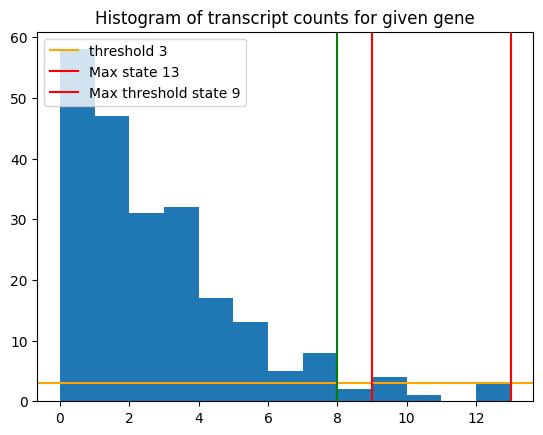

c:\Users\willi\Documents\Year 4 Project Work\Proj_venv\lib\site-packages\cvxpy\reductions\solvers\solving_chain.py:336: FutureWarning: 
    Your problem is being solved with the ECOS solver by default. Starting in 
    CVXPY 1.5.0, Clarabel will be used as the default solver instead. To continue 
    using ECOS, specify the ECOS solver explicitly using the ``solver=cp.ECOS`` 
    argument to the ``problem.solve`` method.
    
  warnings.warn(ECOS_DEPRECATION_MSG, FutureWarning)


N = 9 feasible:


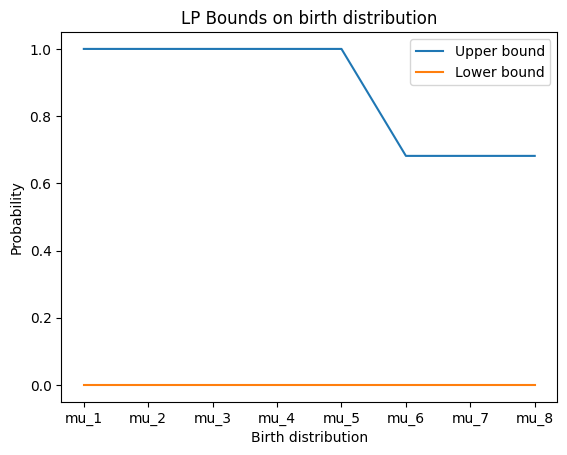

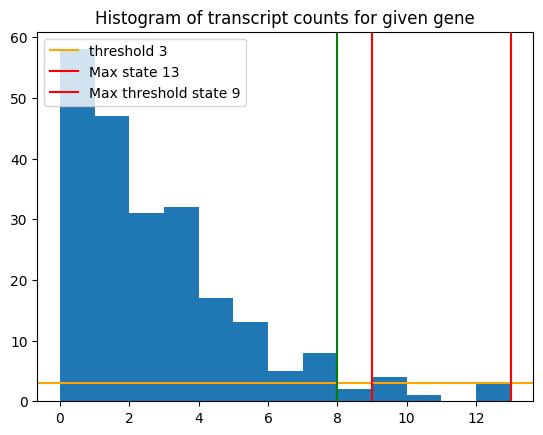

N = 9 feasible:


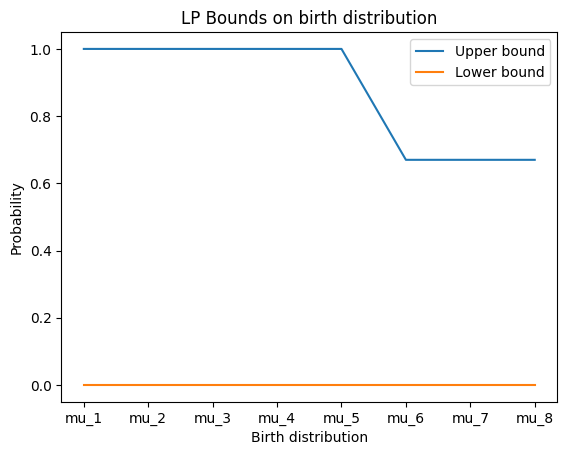

In [16]:
sample_ob = data_OB.iloc[0]
solution_ob_old = bound_sample_refined(sample_ob, threshold=3, skip=1, n=1000,
                                plot_sample=True, print_bounds=False,
                                print_status=True, plot_solution=True)
solution_ob_new = bound_sample_refined_fixed(sample_ob, threshold=3, skip=1, n=1000,
                                plot_sample=True, print_bounds=False,
                                print_status=True, plot_solution=True)

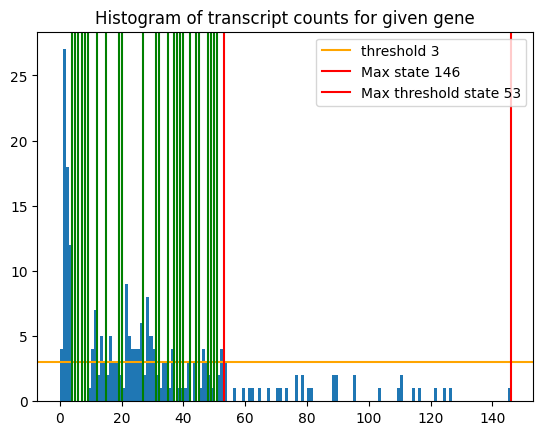

N = 53 feasible:


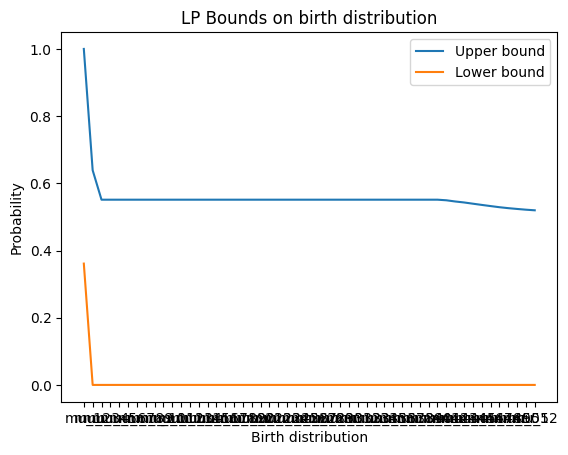

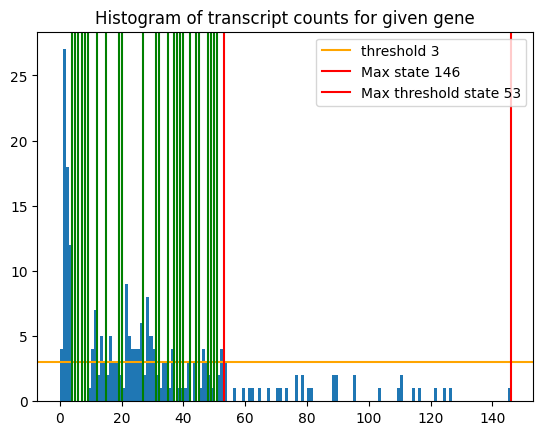

N = 53 feasible:


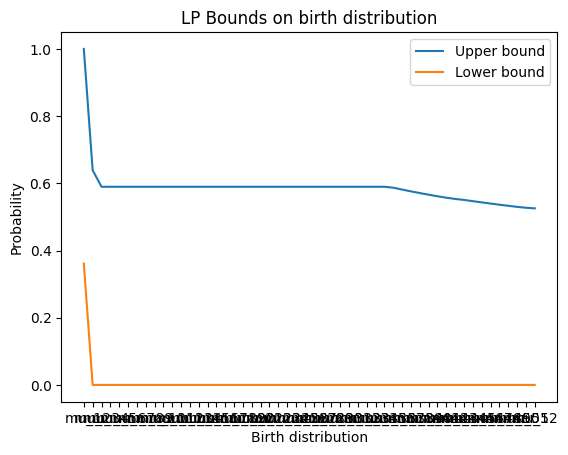

In [17]:
sample_map = data_MAP.iloc[0]
solution_map_old = bound_sample_refined(sample_map, threshold=3, skip=1, n=1000,
                                plot_sample=True, print_bounds=False,
                                print_status=True, plot_solution=True)
solution_map_new = bound_sample_refined_fixed(sample_map, threshold=3, skip=1, n=1000,
                                plot_sample=True, print_bounds=False,
                                print_status=True, plot_solution=True)

In [19]:
# see almost identical (expected slight variation due to bootstrap randomness)
print(solution_map_old)
print(solution_map_new)

{'k0': 1, 'k1': [0.34615384615376354, 0.44444444444448394, 'optimal', 'optimal'], 'mu_1': [0.3611111111024783, 0.9999999999998833, 'optimal', 'optimal'], 'mu_2': [-5.796027954082971e-16, 0.6388888888900899, 'optimal', 'optimal'], 'mu_3': [1.4860125929714024e-15, 0.5512820512838384, 'optimal', 'optimal'], 'mu_4': [-6.8060763165542615e-16, 0.5512820513000072, 'optimal', 'optimal'], 'mu_5': [-5.138914169958407e-15, 0.5512820513044767, 'optimal', 'optimal'], 'mu_6': [-2.4863411148504153e-15, 0.5512820512836843, 'optimal', 'optimal'], 'mu_7': [-5.139540263650318e-16, 0.551282051283136, 'optimal', 'optimal'], 'mu_8': [-6.462820345514374e-16, 0.5512820512836726, 'optimal', 'optimal'], 'mu_9': [1.0585796361395036e-13, 0.5512820512841173, 'optimal', 'optimal'], 'mu_10': [-5.347229949891496e-16, 0.551282051283596, 'optimal', 'optimal'], 'mu_11': [7.6088120133329e-14, 0.5512820512839554, 'optimal', 'optimal'], 'mu_12': [9.035829261857255e-14, 0.551282051284994, 'optimal', 'optimal'], 'mu_13': [-6

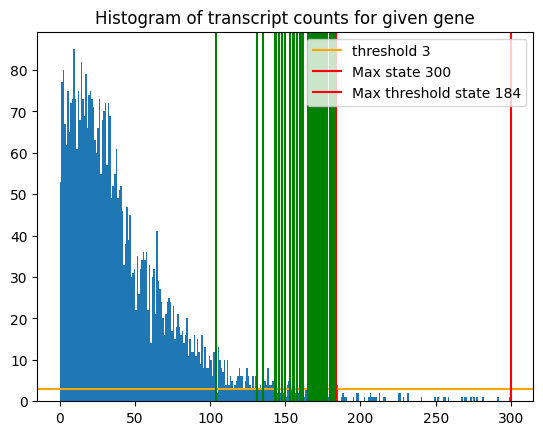

N = 30 feasible:


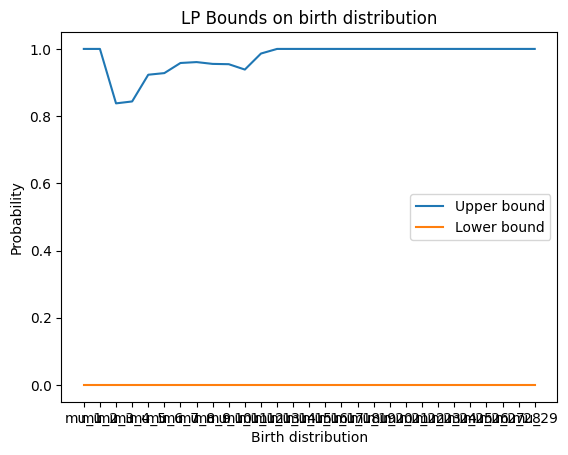

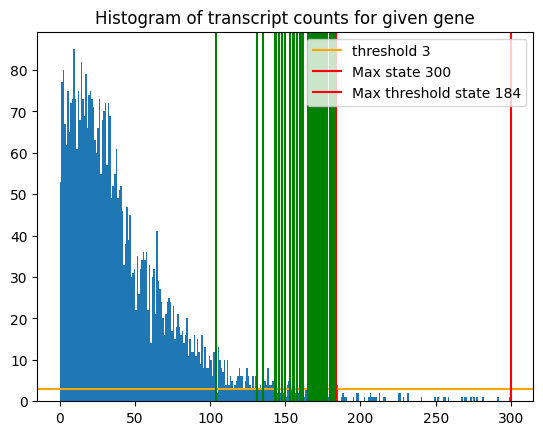

N = 30 feasible:


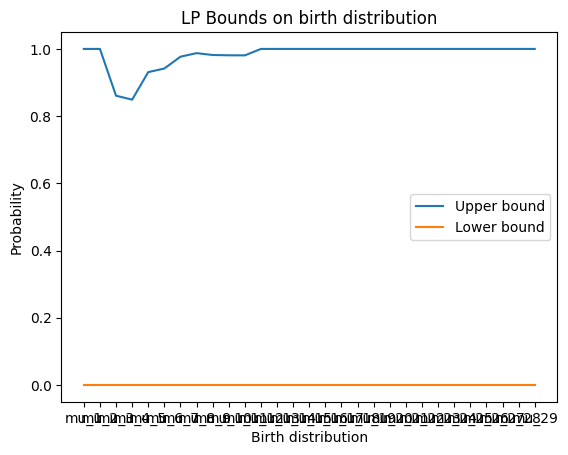

In [21]:
sample_ps = data_PS.iloc[0]
solution_ps_old = bound_sample_refined(sample_ps, threshold=3, skip=1, n=1000, N=30,
                                plot_sample=True, print_bounds=False,
                                print_status=True, plot_solution=True)
solution_ps_new = bound_sample_refined_fixed(sample_ps, threshold=3, skip=1, n=1000, N=30,
                                plot_sample=True, print_bounds=False,
                                print_status=True, plot_solution=True)

As seen with previous reaction systems, adding the missing constraint did not give any meaningful changes, so all results should still hold. However, it is still important to have all constraints present in the model for completeness, and to ensure the solution bounds are the best we can obtain.